## Notebook for exploration of NN methods (mostly for personal learning)

In [8]:
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import funclib


### PyTorch

##### PRACTICE WITH LAYER TYPES

In [1]:
import torch
from torch import nn

# LINEAR LAYER 
# B hand
x = torch.tensor([1,2,3,4], dtype=torch.float32) # inputs [4]
theta = torch.tensor([[0,0,0,0],  # wieghts [3, 4]
                      [1,1,1,1],
                      [2,2,2,2]], dtype=torch.float32)
x_new = theta.matmul(x) # outputs [3]
print(x_new)
# In PyTorch
# Note: will NOT get the n_new, becasue uses RANDOM theta matrix (since the point is the trianing fills it). 
# If really wanted, could set linear1.wieght = nn.Parameter(theta) (ever be usefull? Perhaps some initialization?)
# Also adds a small (random?) bias to each x_new (again, getting this value is the point of training)
# If really wanted, could set bias=False
linear1 = nn.Linear(in_features=4, out_features=3) 
x_new = linear1(x) 
print(x_new)

# CONVOLUTIONAL LAYER
# In PyTorch
x = torch.tensor([[0,1,1,0,0,0],  # wieghts [3, 4]
                  [0,1,1,0,0,0],
                  [0,1,1,0,0,0],
                  [0,0,1,1,0,0],
                  [0,0,0,0,1,1]], dtype=torch.float32)
in_channels = 1 # number of features? Like, would I pass x1, x2, x3 images (e.g. og_val, gradx, grady) and set in_channels=3?
out_channels = 1 # THIS IS ACTUALLY THE NUMBER OF FILTERS IN THE LAYER, each one produces a distinct output arrays "feature maps"
kernel_size = 3 # size of the filter (e.g kernal_size^2)
stride = 1 # num pix to slide over after each application of the filter
padding = 'same' # pad such that output is same dim as input
conv1 = nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=kernel_size, stride=stride, padding=padding)   

# ACCESSING THESE LAYERS AS PART OF A NN
# Define class MyNeuralNet
class MyNeuralNet(nn.Module):
  def __init__(self):
    super(MyNeuralNet, self).__init__()
    self.linear1 = nn.Linear(in_features=4, out_features=3) 
    self.conv1 = nn.Conv2d(in_channels=2, out_channels=3, kernel_size=4, stride=1, padding='same')  
    self.conv3 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=4, stride=1, padding='same') 
nn = MyNeuralNet()
print(nn.conv1)
print(nn.conv1.weight.shape) # tensor of shape  [2, 2, 4, 4] becasue 2 in_channels (feature images), 3 out_channels (two filters)
    


KeyboardInterrupt: 

#### TUTORIALS

#####  1) Simple PyTorch tutorial https://medium.com/analytics-vidhya/a-simple-neural-network-classifier-using-pytorch-from-scratch-7ebb477422d2 

In [91]:
from sklearn.datasets import make_classification
import torch
from torch.utils.data import Dataset, TensorDataset, DataLoader
from torch import nn

# Define Data class for ease of access 
class Data(Dataset):

  def __init__(self, X_train, y_train):
    self.X = torch.from_numpy(X_train.astype(np.float32))
    self.y = torch.from_numpy(y_train).type(torch.LongTensor)
    self.len = self.X.shape[0]
  
  def __getitem__(self, index):
    return self.X[index], self.y[index]
    
  def __len__(self):
    return self.len

# Generate fake data
X, Y = make_classification(n_samples=100, n_features=4, n_redundant=0, n_informative=3,  n_clusters_per_class=2, n_classes=3)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
batch_size = 3
traindata = Data(X_train, Y_train)
trainloader = DataLoader(traindata, batch_size=batch_size, shuffle=True, num_workers=2)
testdata = Data(X_test, Y_test)
testloader = DataLoader(testdata, batch_size=batch_size, shuffle=True, num_workers=2)

print('Test data:')
print('     '+str(X_test.shape[0])+' obs, with '+str(str(X_test.shape[1]))+' features')
print('     '+str(len(np.unique(Y_test)))+' unique target values: ', np.unique(Y_test))
print('     '+str(X_test.shape[0]/batch_size)+' batches of '+str(batch_size)+' obs each')
print('     '+str(len(testloader))+' sets in the dataloader')
print('Test data:')
n_batch = len(testloader)
n_obsperbatch = len(list(testloader)[0][0]) # same as len(list(testloader)[0][1])
n_featperobs = len(list(testloader)[0][0][0])
print('     '+str(n_batch*n_obsperbatch)+' obs, with '+str(n_featperobs)+' features')
print('     '+str(n_batch)+' batches of '+str(n_obsperbatch)+' obs each (last one has less if not evenly divisible)')
print('     '+str(len(testloader))+' sets in the dataloader')

a=b

input_dim = 4 # number of features (len of X cols)
hidden_layers = 25 # really num nodes in hidden layer??
output_dim = 3 # number of classes (unique of y)

# Define class MyNeuralNet
class MyNeuralNet(nn.Module):

  def __init__(self): 
    super(MyNeuralNet, self).__init__()
    self.linear1 = nn.Linear(input_dim, hidden_layers) 
    self.linear2 = nn.Linear(hidden_layers, output_dim) # so becasue output_dim is num classes, outputs will be class probs?
    
  def forward(self, x):
    x = torch.sigmoid(self.linear1(x))
    x = self.linear2(x)
    return x

# Define model (as an instance of MyNeuralNet), loss function and optimizer
model = MyNeuralNet()
print('model: \n', model)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1) # lr is learning rate

# Train
epochs = 2
for epoch in range(epochs):
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    optimizer.zero_grad()
    outputs = model(inputs) # outputs is n_obs times output_dim -> prob of each class?
    loss = loss_fn(outputs, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.5f}')

# Save the trained NN
torch.save(model.state_dict(), 'NN_tutorial.pth')

# Read it back in 
net = MyNeuralNet()
net.load_state_dict(torch.load('NN_tutorial.pth'))

# Test 
correct, total = 0, 0
batch = 0
with torch.no_grad():
  for data in testloader:
    inputs, labels = data
    y_hat = model(inputs)  # [4, 3] : Weights of each class for each obs (so y_hat is 4 obs by 3 wieghts big)
    wieghts, y_pred = torch.max(y_hat.data, 1) # [4], [4] : Returns most probable class and wieght (but documentation says idx??) of that class for each obs (so weights and y_pred are 1D of length n_obs). NOTE: how the heck does this function return the actual class, since I dont input them?
    print('Batch: ', batch)
    print('   y_hat: ', y_hat)
    print('   First few true: ', labels[0:6])
    print('   First few pred:', y_pred[0:6])
    print('   Wgts of these pred:', wieghts[0:6])
    total += labels.size(0)
    correct += (y_pred == labels).sum().item()
    batch +=1
print(f'Accuracy of the network on the {len(testdata)} test data: {100 * correct // total} %')

Test data:
     33 obs, with 4 features
     3 unique target values:  [0 1 2]
     11.0 batches of 3 obs each
     11 sets in the dataloader
Test data:
[tensor([[ 1.7681, -1.9083,  1.0539, -1.6828],
        [ 1.2031, -1.5322,  1.2384, -0.5025],
        [ 1.5605,  3.5121,  2.4255,  1.1760]]), tensor([1, 0, 0])]


NameError: name 'b' is not defined

##### 2) More complex PyTorch tutorial (doing regression) https://www.youtube.com/watch?v=SDPeeX6LEnk&t=907s 

In [11]:
'''
Main difference -> instead of just training for N epochs, also tests for each of those epochs. Not yet really sure if thats necesary.
                -> regression, so instead of model outputting prob of each class, outputs just prediction?
'''

import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torch import nn

train_df = pd.read_csv('../NN_testdata/california_housing_train.csv')
test_df = pd.read_csv('../NN_testdata/california_housing_test.csv')

# Set up training and testing data
batch_size = 40
X_train = train_df.to_numpy()[:, :-1]
Y_train = train_df.to_numpy()[:, -1]
X_test = test_df.to_numpy()[:, :-1]
Y_test = test_df.to_numpy()[:, -1]
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float), torch.tensor(Y_train, dtype=torch.float))
train_dataloader = DataLoader(train_dataset, batch_size=batch_size) # not sure what 'batch_size' does. Defualts to 1.
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float), torch.tensor(Y_test, dtype=torch.float))
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

print('Test data:')
print('     '+str(X_test.shape[0])+' obs, with '+str(str(X_test.shape[1]))+' features')
print('     '+str(len(np.unique(Y_test)))+' unique target values: ', np.unique(Y_test))
print('     '+str(X_test.shape[0]/batch_size)+' batches of '+str(batch_size)+' obs each')
print('     '+str(len(test_dataloader))+' sets in the dataloader')

# Define class MyNeuralNet
class MyNeuralNet(nn.Module):

    def __init__(self):
        # Call init method inherated from nn.Module
        super(MyNeuralNet, self).__init__()
        # Define layers (not necesarily in order)
        self.hidden_layer_1 = nn.Linear(8, batch_size) # input and output dimensions - so should 8 be X_train.shape[1], 64 is batch_size I guess?
        self.hidden_activation = nn.ReLU()
        self.out = nn.Linear(batch_size, 1)
    
    def forward(self, x):
        # Run the NN by calling the layers on the data
        x = self.hidden_layer_1(x)
        x = self.hidden_activation(x)
        x = self.out(x)
        return x

# Define model (as an instance of MyNeuralNet), loss function and optimizer
model = MyNeuralNet().to('cpu')
print('Model: \n', model)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) # lr is learning rate

# Define training function
def train(dataloader, model, loss_fn, optimizer):
    print('Training - ')
    model.train() # set model into training mode
    loss = 0
    for i, (X, y) in enumerate(dataloader):
        X, y = X.to('cpu'), y.to('cpu')
        y_hat = model(X)
        err = loss_fn(y_hat, y)
        loss += err.item() # .item gets the value from the nn.MSELoss object
        optimizer.zero_grad() # set derivatives to zero
        err.backward() # do a "backwards pass" on anything thats trainable in model to get derivative
        optimizer.step() # step according to the gradients
    num_batches =  len(dataloader)
    train_loss = loss/num_batches
    print('     Avg train loss per batch: ', train_loss)

# Define testing function
def test(dataloader, model, loss_fn):
    print('Testing - ')
    model.eval() # set model into evaluation mode
    loss = 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to('cpu'), y.to('cpu')
            y_hat = model(X)  # [40,1] - this model does regression, so just returns value not class weigts?
            # wieghts, y_pred = torch.max(y_hat.data, 1) # so dont need this? (I added it)
            err = loss_fn(y_hat, y)
            loss += err.item() # .item gets the value from the nn.MSELoss object
    num_batches = len(dataloader)
    test_loss = loss/num_batches
    print('     Avg test loss per batch: ', test_loss)

# For a bunch of epochs, train and test
epochs = 10
for epoch in range(epochs):
    print('EPOCH ', epoch)
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)

# Save the trained NN
torch.save(model.state_dict(), 'NN_tutorial2.pth')



shape X_trian  (17000, 8)
shape Y_trian  (17000,)


NameError: name 'b' is not defined

##### 3) Convolutional Nueral Net 

##### 4) UNet https://medium.com/mlearning-ai/semantic-segmentation-with-pytorch-u-net-from-scratch-502d6565910a 

In [64]:
'''
Tutorial 1
Semantic segmentation using a CNN (but NOT a UNet)
Main difference to "normal" NN is CNN does operations on 2D arrays not just 1D input vectors
'''

import torch
from torch.utils.data import Dataset, TensorDataset, DataLoader
from torch import nn

# Define class MyBlock, with which to build blocks of layers
class MyBlock(nn.Module):

    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=0):
        # Call init method inherated from nn.Module
        super(MyBlock, self).__init__()
        # Define block of layers (?)
        self.seq_block = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True))

    def forward(self, x):
        x = self.seq_block(x)
        return x

# Define class MyBlocks using MyBlock, with which to build Encoder and Decoder 
class MyBlocks(nn.Module):

    def __init__(self,  n_conv, in_channels, out_channels, padding):
        # Call init method inherated from nn.Module
        super(CNNBlocks, self).__init__()
        # Initialize list of layers
        self.layers = nn.ModuleList()
        # Fill list of layers with layer blocks defined with MyBlock
        for i in range(n_conv):
            self.layers.append(MyBlock(in_channels, out_channels, padding=padding))
            # after each convolution we set (next) in_channel to (previous) out_channels
            in_channels = out_channels

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

# Define class MyEncoder that will become part of MyUNet
class MyEncoder(nn.Module):

    def __init__(self,  in_channels, out_channels, padding, downhill=4):
        # Call init method inherated from nn.Module
        super(Encoder, self).__init__()
        # Initialize list of layers
        self.enc_layers = nn.ModuleList()
        # Fill list of layers with layer blocks with blocks defined with MyBlocks
        for _ in range(downhill):
            self.enc_layers += [
                    MyBlocks(n_conv=2, in_channels=in_channels, out_channels=out_channels, padding=padding),
                    nn.MaxPool2d(2, 2)]
            # after each convolution we set (next) in_channel to (previous) out_channels    
            in_channels = out_channels
            out_channels *= 2
        # double the dept of the last CNN block
        self.enc_layers.append(CNNBlocks(n_conv=2, in_channels=in_channels, out_channels=out_channels, padding=padding))

    def forward(self, x):
        route_connection = []
        for layer in self.enc_layers:
            if isinstance(layer, MysBlocks):
                x = layer(x)
                route_connection.append(x)
            else:
                x = layer(x)
        return x, route_connection


# Define class MyDecoder that will become part of MyUNet
class MyDecoder(nn.Module):

    def __init__(self, in_channels, out_channels, exit_channels, padding, uphill=4):
        # Call init method inherated from nn.Module
        super(MyDecoder, self).__init__()
        # Set 
        self.exit_channels = exit_channels
        # Initialize list of layers
        self.layers = nn.ModuleList()
        # Fill list of layers with layer blocks with blocks defined with MyBlocks (and a ConvTranspose layer?)
        for i in range(uphill):
            self.layers += [
                nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2),
                MyBlocks(n_conv=2, in_channels=in_channels, out_channels=out_channels, padding=padding),]
            in_channels //= 2
            out_channels //= 2

        # 1) cannot be a CNNBlock because it has ReLU incorpored
        # 2) cannot append nn.Sigmoid here because you should be later using
        #    BCELoss () which will trigger the amp error "are unsafe to autocast".
        self.layers.append(
            nn.Conv2d(in_channels, exit_channels, kernel_size=1, padding=padding),)



##### 5) UNet  https://www.youtube.com/watch?v=IHq1t7NxS8k&t=3s

In [31]:
'''
UNet tutorial 2 (code at https://github.com/aladdinpersson/Machine-Learning-Collection/tree/master/ML/Pytorch/image_segmentation/semantic_segmentation_unet)
Can't actualy make this run - takes way to long.
'''

import torch
import torch.nn as nn
import torchvision.transforms.functional as TF
import os
from PIL import Image
from torch.utils.data import Dataset, TensorDataset, DataLoader
import albumentations as alb
from albumentations.pytorch import ToTensorV2
from tqdm import tqdm
import torch.optim as optim
import numpy as np


# Creat class for convenience to load in data (inherates from torch Dataset class)
class CarvanaDataset(Dataset):

    # Set attributes for the image data and label dirs and transform to use (passed in) and put image data files in list
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.images = os.listdir(image_dir)

    # So can call CarvanaDataset.len?
    def __len__(self):
        return len(self.images)

    # How do you use this???
    def __getitem__(self, index):
        img_path = os.path.join(self.image_dir, self.images[index]) # path to one data image
        mask_path = os.path.join(self.mask_dir, self.images[index].replace(".jpg", "_mask.gif")) # path to one labels image (and change file ext)
        image = np.array(Image.open(img_path).convert("RGB")) # convert to RBG - is this then a [3, npix, npix] array?
        mask = np.array(Image.open(mask_path).convert("L"), dtype=np.float32)
        mask[mask == 255.0] = 1.0 # want masks to be 1s and 0s, but currently car = 255
        # 
        if self.transform is not None:
            augmentations = self.transform(image=image, mask=mask)
            image = augmentations["image"]
            mask = augmentations["mask"]

        return image, mask

# Define class DoubleConv to create a containor for multiple layers (for convenience)
class DoubleConv(nn.Module):

    def __init__(self, in_channels, out_channels):
        # Call init method inherated from nn.Module
        super(DoubleConv, self).__init__()
        # Define layer that is a bunch of layers
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding='same', bias=False),
            nn.BatchNorm2d(out_channels), # 
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding='same', bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),)

    def forward(self, x):
        return self.conv(x)

# Define class MyUNet
class MyUNet(nn.Module):

    def __init__(self, in_channels=3, out_channels=1, features=[64, 128, 256, 512],): # features is num features?
        
        # Call init method inherated from nn.Module
        super(MyUNet, self).__init__()
        # Initialize two lists of layers: one for down one for up
        self.ups = nn.ModuleList()
        self.downs = nn.ModuleList()
        # Define pooling layer (recall: this is not saying the pooling layer is called after the up and down stuff; its just defining the up, down, and pool attributes all together here)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fill list of down layers 
        for feature in features:
            self.downs.append(DoubleConv(in_channels, feature))
            # after each convolution we set (next) in_channel to (previous) out_channels  
            in_channels = feature

        # Fill list of up layers 
        for feature in reversed(features):
            self.ups.append(nn.ConvTranspose2d(feature*2, feature, kernel_size=2, stride=2,))
            self.ups.append(DoubleConv(feature*2, feature))

        # Define ayer at the bottom (??????)
        self.bottleneck = DoubleConv(features[-1], features[-1]*2)

        # Define last conv to get correct output num channels
        self.final_conv = nn.Conv2d(features[0], out_channels, kernel_size=1)

    def forward(self, x):

        # Initialize list to store skip connections
        skip_connections = []

        # Do all the downs in self.downs
        for down in self.downs:
            x = down(x)
            skip_connections.append(x) # NEED TO LEARN ABOUT SKIP_CONNECTIONS
            x = self.pool(x)

        # Perform bottleneck layer
        x = self.bottleneck(x)
        skip_connections = skip_connections[::-1] # reverse 

        # Do all the ups in self.ups
        for idx in range(0, len(self.ups), 2): # step of 2 becasue add conv step
            x = self.ups[idx](x)
            skip_connection = skip_connections[idx//2]
            if x.shape != skip_connection.shape:
                x = TF.resize(x, size=skip_connection.shape[2:])
            concat_skip = torch.cat((skip_connection, x), dim=1)
            x = self.ups[idx+1](concat_skip)

        return self.final_conv(x)

# Create training function to train one epoch
def train_fn(loader, model, optimizer, loss_fn, scaler):
    
    loop = tqdm(loader) # is this a progress bar? but then below its looping through loop

    for batch_idx, (data, targets) in enumerate(loop):
        data = data.to(device="cpu")
        targets = targets.float().unsqueeze(1).to(device="cpu")

        # forward
        with torch.cuda.amp.autocast():
            predictions = model(data)
            loss = loss_fn(predictions, targets)

        # backward
        optimizer.zero_grad()
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        # update tqdm loop
        loop.set_postfix(loss=loss.item())

# Get the data, applying some transformations
batch_size = 16
height = 160; width = 240  # cut image to this size, from original [1280, 1918]
train_transform = alb.Compose([alb.Resize(height, width), alb.Rotate(limit=35, p=1.0), alb.HorizontalFlip(p=0.5), alb.VerticalFlip(p=0.1),
                               alb.Normalize(mean=[0.0, 0.0, 0.0], std=[1.0, 1.0, 1.0], max_pixel_value=255.0), ToTensorV2()])
val_transform = alb.Compose([alb.Resize(height, width), alb.Normalize(mean=[0.0, 0.0, 0.0], std=[1.0, 1.0, 1.0], max_pixel_value=255.0),
                              ToTensorV2()])
train_ds = CarvanaDataset(image_dir="../NN_testdata/CarData/train/train", mask_dir="../NN_testdata/CarData/train_masks/train_masks", transform=train_transform)
train_loader = DataLoader(train_ds, batch_size=batch_size, num_workers=2, pin_memory=True, shuffle=True)
val_ds = CarvanaDataset(image_dir="../NN_testdata/CarData/test/test", mask_dir="../NN_testdata/CarData/test_hq/test_hq", transform=val_transform)
val_loader = DataLoader(val_ds, batch_size=batch_size, num_workers=2, pin_memory=True, shuffle=False)

# Check data is loaded correctly
print('Train data:')
print(f'     {len(train_ds)} obs, broken into {len(train_loader)} batches')
train_features, train_labels = next(iter(train_loader))
shape = train_features.size()
print(f'     Each batch is shape {train_features.size()}, e.g. {shape[0]} images, {[shape[2], shape[3]]} pixels each, {shape[1]} layers (features)')

# Define model (as an instance of MyNeuralNet), loss function, and optimizer
model = MyUNet(in_channels=3, out_channels=1).to("cpu") #  NOTE: FOR MULTICLASS, CHANGE OUT_CHANNELS TO NUM CLASSES!!!
print('model: \n', model)
loss_fn = nn.BCEWithLogitsLoss() # NOTE: FOR MULTICLASS, USE CROSS ENTROPY LOSS!!!
optimizer = optim.Adam(model.parameters(), lr=1e-4)
load_model = False
if load_model:
    checkpoint = torch.load("my_checkpoint.pth.tar")
    model.load_state_dict(checkpoint["state_dict"])

# check accuracy (e.g. test? why are we doing that before any training???) NOTE: WILL NOT WORK FOR MULTICLASS
num_correct = 0
num_pixels = 0
dice_score = 0
model.eval() # set model into eval mode
with torch.no_grad():
    for x, y in val_loader:
        x = x.to("cpu")
        y = y.to("cpu").unsqueeze(1)
        preds = torch.sigmoid(model(x)) # call model to get predictions
        preds = (preds > 0.5).float()
        num_correct += (preds == y).sum()
        num_pixels += torch.numel(preds)
        dice_score += (2 * (preds * y).sum()) / ((preds + y).sum() + 1e-8)
print(f"Got {num_correct}/{num_pixels} with acc {num_correct/num_pixels*100:.2f}")
print(f"Dice score: {dice_score/len(loader)}")
model.train() # set model back into train mode

# Train 
num_epochs = 3
scaler = torch.cuda.amp.GradScaler()
for epoch in range(num_epochs):

    # Train on thi
    train_fn(train_loader, model, optimizer, loss_fn, scaler)

    # Save a snapshot of the trained model training up untill this point (why would you want to save a checkpoint?)
    state = {"state_dict": model.state_dict(), "optimizer":optimizer.state_dict(),}
    torch.save(state, "my_checkpoint.pth.tar")

    # check accuracy (e.g. test? during the training?) NOTE: WILL NOT WORK FOR MULTICLASS
    num_correct = 0
    num_pixels = 0
    dice_score = 0
    model.eval() # set model into eval mode
    with torch.no_grad():
        for x, y in val_loader:
            x = x.to("cpu")
            y = y.to("cpu").unsqueeze(1)
            preds = torch.sigmoid(model(x))
            preds = (preds > 0.5).float()
            num_correct += (preds == y).sum()
            num_pixels += torch.numel(preds)
            dice_score += (2 * (preds * y).sum()) / ((preds + y).sum() + 1e-8)
    print(f"Got {num_correct}/{num_pixels} with acc {num_correct/num_pixels*100:.2f}")
    print(f"Dice score: {dice_score/len(loader)}")
    model.train() # set model back into train mode

    # print some examples to a folder
    model.eval() # set model into eval mode
    for idx, (x, y) in enumerate(val_loader):
        x = x.to(device="cpu")
        with torch.no_grad():
            preds = torch.sigmoid(model(x))
            preds = (preds > 0.5).float() 
        torchvision.utils.save_image(preds, f"saved_images/pred_{idx}.png")
        torchvision.utils.save_image(y.unsqueeze(1), f"saved_images/true_{idx}.png")
    model.train() # set model back into train mode




Train data:
     5088 obs, broken into 318 batches
     Each batch is shape torch.Size([16, 3, 160, 240]), e.g. 16 images, [160, 240] pixels each, 3 layers (features)
     Each batch has labels of shape torch.Size([16, 160, 240])


NameError: name 'b' is not defined

In [ ]:
'''
Tutorial 3) https://www.youtube.com/watch?v=GAYJ81M58y8&t=3s
'''

#### APPLICATIONS

##### Tutorial (1) method

In [43]:
'''
Tutorial (1) method
On much reduced data so I can run locally 
- Should be similar to tutorial data - predict small number of numerical class labels from small number of numerical feats
- WHY ARE ALL THE CLASS WEIGHTS THE SAME FOR EVERY OBS!?!
    Is this model just terrible for this task? always predicts class 0
    Maybe I need a to use an architecture specific to image segmentation -  UNet?
'''

import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torch import nn

batch_size = 20

# Get data (DKIST images) and labels 
data = fits.open("../Data/DKIST_example.fits")[0].data.byteswap().newbyteorder()[0:500, 0:500]
labels = np.squeeze(fits.open("../Data/DKIST_solarseg_output.fits")[0].data)[0:500, 0:500]
for file in os.listdir('../Data/DKIST_gband_series_183653/'):
        if file.startswith('SEG_'):
            path = '../Data/DKIST_gband_series_183653/'+file
            data1 = fits.open(path)[1].data.byteswap().newbyteorder()[0:500, 0:500]
            data = np.concatenate((data, data1), axis=1)
            labels1 = np.squeeze(fits.open(path)[0].data)[0:500, 0:500]
            labels = np.concatenate((labels, labels1), axis=1)

# Prepare half for training and testing (split along 'short' axis to encompass all)
tt_data = data[0:int(np.shape(data)[0]/2), :]
tt_labels = labels[0:int(np.shape(data)[0]/2), :]
X_tt, Y_tt = funclib.pre_proccess(tt_data, tt_labels)
X_train, X_test, Y_train, Y_test = train_test_split(X_tt, Y_tt, test_size=0.4, random_state=20)

# Prepare other half for validation
tt_data = data[int(np.shape(data)[0]/2):-1, :]
tt_labels = labels[int(np.shape(data)[0]/2):-1, :]
X_val, Y_val = funclib.pre_proccess(tt_data, tt_labels)
# Set up training, testing, validation dataloaders
X_train_np = X_train.to_numpy() # convert df to np array (just turns into array by removing col names and row idx)
Y_train_np = Y_train #.reshape(-1, 1) WHY WAS i RESHAPING THESE? LOOKS LIKE ABOVE ITS SHAPE (N,) # already array, but reshape from (N,) to (N,1)
X_test_np = X_test.to_numpy() # convert df to np array (just turns into array by removing col names and row idx)
Y_test_np = Y_test #.reshape(-1, 1) # already array, but reshape from (N,) to (N,1)
X_val_np = X_val.to_numpy() # convert df to np array (just turns into array by removing col names and row idx)
Y_val_np = Y_val #.reshape(-1, 1) # already array, but reshape from (N,) to (N,1)
train_dataset = TensorDataset(torch.tensor(X_train_np, dtype=torch.float), torch.tensor(Y_train_np, dtype=torch.long)) # y's must be LongTensor (int) NOT float for classification
train_dataloader = DataLoader(train_dataset, batch_size=batch_size) # not sure what 'batch_size' does. Defualts to 1.
test_dataset = TensorDataset(torch.tensor(X_test_np, dtype=torch.float), torch.tensor(Y_test_np, dtype=torch.long))
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)
val_dataset = TensorDataset(torch.tensor(X_val_np, dtype=torch.float), torch.tensor(Y_val_np, dtype=torch.long))
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

print('Test data:')
print('     '+str(X_test_np.shape[0])+' obs, with '+str(str(X_test_np.shape[1]))+' features')
print('     '+str(len(np.unique(Y_test_np)))+' unique target values: ', np.unique(Y_test_np))
print('     '+str(X_test_np.shape[0]/batch_size)+' batches of '+str(batch_size)+' obs each')
print('     '+str(len(test_dataloader))+' sets in the dataloader')

input_dim = X_test_np.shape[1] # number of features (len of X cols)
hidden_layers = 25 # number of hidden layers
output_dim = len(np.unique(Y_test_np)) # number of classes (unique of y)

# Define class MyNeuralNet
class MyNeuralNet(nn.Module):

  def __init__(self):
    super(MyNeuralNet, self).__init__()
    self.linear1 = nn.Linear(input_dim, hidden_layers) 
    self.linear2 = nn.Linear(hidden_layers, output_dim) # so becasue output_dim is num classes, outputs will be class probs?
    
  def forward(self, x):
    x = torch.sigmoid(self.linear1(x))
    x = self.linear2(x)
    return x

# Define model (as an instance of MyNeuralNet), loss function and optimizer
model = MyNeuralNet()
print('model: \n', model)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1) # lr is learning rate

# Train
epochs = 2
for epoch in range(epochs):
  running_loss = 0.0
  for i, data in enumerate(train_dataloader, 0):
    inputs, labels = data
    optimizer.zero_grad()
    outputs = model(inputs) # outputs is n_obs times output_dim -> prob of each class?
    loss = loss_fn(outputs, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.5f}')

# Save the trained NN
torch.save(model.state_dict(), 'NN_tutorial.pth')

# Read it back in 
net = MyNeuralNet()
net.load_state_dict(torch.load('NN_tutorial.pth'))

# Test 
correct, total = 0, 0
batch = 0
with torch.no_grad():
  for data in test_dataloader:
    inputs, labels = data
    y_hat = model(inputs)  # WHY ARE ALL THE CLASS WIEGHTS THE SAME FOR EVERY OBS!?! # [20, 4] : Weights of each class for each obs (so y_hat is 20 obs by 4 class wieghts big)
    wieghts, y_pred = torch.max(y_hat.data, 1) # [4], [4] : Returns most probable class and wieght (but documentation says idx??) of that class for each obs (so weights and y_pred are 1D of length n_obs). NOTE: how the heck does this function return the actual class, since I dont input them?
    print('Batch: ', batch)
    print('   shape y_hat: ', y_hat.shape)
    print('   y_hat: ', y_hat)
    print('   First few true: ', labels[0:6])
    print('   First few pred:', y_pred[0:6])
    print('   Wgts of thess pred:', wieghts[0:6])
    a=b
    total += labels.size(0)
    correct += (y_pred == labels).sum().item()
    batch +=1
print(f'Accuracy of the network on the {len(X_test_np)} test data: {100 * correct // total} %')


Test data:
     500000 obs, with 6 features
     4 unique target values:  [0 1 2 3]
     25000.0 batches of 20 obs each
     25000 sets in the dataloader
model: 
 MyNeuralNet(
  (linear1): Linear(in_features=6, out_features=25, bias=True)
  (linear2): Linear(in_features=25, out_features=4, bias=True)
)
[1, 37500] loss: 14.29524
[2, 37500] loss: 14.29498
Batch:  0
   shape y_hat:  torch.Size([20, 4])
   y_hat:  tensor([[ 2.8297, -1.0105,  2.6696, -4.8646],
        [ 2.8297, -1.0105,  2.6696, -4.8646],
        [ 2.8297, -1.0105,  2.6696, -4.8646],
        [ 2.8297, -1.0105,  2.6696, -4.8646],
        [ 2.8297, -1.0105,  2.6696, -4.8646],
        [ 2.8297, -1.0105,  2.6696, -4.8646],
        [ 2.8297, -1.0105,  2.6696, -4.8646],
        [ 2.8297, -1.0105,  2.6696, -4.8646],
        [ 2.8297, -1.0105,  2.6696, -4.8646],
        [ 2.8297, -1.0105,  2.6696, -4.8646],
        [ 2.8297, -1.0105,  2.6696, -4.8646],
        [ 2.8297, -1.0105,  2.6696, -4.8646],
        [ 2.8297, -1.0105,  2.6696

NameError: name 'b' is not defined

##### Tutorial (2) method

In [35]:
'''
On much reduced data so I can run locally 
MAYBE I SHOULDNT TRY FORCING A REGRESSION MODEL INTO A CLASSIFICATION MODEL
'''

import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torch import nn

batch_size = 20

# Get data (DKIST images) and labels 
data = fits.open("../Data/DKIST_example.fits")[0].data.byteswap().newbyteorder()[0:500, 0:500]
labels = np.squeeze(fits.open("../Data/DKIST_solarseg_output.fits")[0].data)[0:500, 0:500]
for file in os.listdir('../Data/DKIST_gband_series_183653/'):
        if file.startswith('SEG_'):
            path = '../Data/DKIST_gband_series_183653/'+file
            data1 = fits.open(path)[1].data.byteswap().newbyteorder()[0:500, 0:500]
            data = np.concatenate((data, data1), axis=1)
            labels1 = np.squeeze(fits.open(path)[0].data)[0:500, 0:500]
            labels = np.concatenate((labels, labels1), axis=1)

# Prepare half for training and testing (split along 'short' axis to encompass all)
tt_data = data[0:int(np.shape(data)[0]/2), :]
tt_labels = labels[0:int(np.shape(data)[0]/2), :]
X_tt, Y_tt = funclib.pre_proccess(tt_data, tt_labels)
X_train, X_test, Y_train, Y_test = train_test_split(X_tt, Y_tt, test_size=0.4, random_state=20)

# Prepare other half for validation
tt_data = data[int(np.shape(data)[0]/2):-1, :]
tt_labels = labels[int(np.shape(data)[0]/2):-1, :]
X_val, Y_val = funclib.pre_proccess(tt_data, tt_labels)

# Set up training, testing, validation dataloaders
X_train_np = X_train.to_numpy() # convert df to np array (just turns into array by removing col names and row idx)
Y_train_np = Y_train.reshape(-1, 1) # already array, but reshape from (N,) to (N,1)
X_test_np = X_test.to_numpy() # convert df to np array (just turns into array by removing col names and row idx)
Y_test_np = Y_test.reshape(-1, 1) # already array, but reshape from (N,) to (N,1)
X_val_np = X_val.to_numpy() # convert df to np array (just turns into array by removing col names and row idx)
Y_val_np = Y_val.reshape(-1, 1) # already array, but reshape from (N,) to (N,1)
train_dataset = TensorDataset(torch.tensor(X_train_np, dtype=torch.float), torch.tensor(Y_train_np, dtype=torch.float))
train_dataloader = DataLoader(train_dataset, batch_size=batch_size) # not sure what 'batch_size' does. Defualts to 1.
test_dataset = TensorDataset(torch.tensor(X_test_np, dtype=torch.float), torch.tensor(Y_test_np, dtype=torch.float))
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)
val_dataset = TensorDataset(torch.tensor(X_val_np, dtype=torch.float), torch.tensor(Y_val_np, dtype=torch.float))
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

print('Test data:')
print('     '+str(X_test_np.shape[0])+' obs, with '+str(str(X_test_np.shape[1]))+' features')
print('     '+str(len(np.unique(Y_test_np)))+' unique target values: ', np.unique(Y_test_np))
print('     '+str(X_test_np.shape[0]/batch_size)+' batches of '+str(batch_size)+' obs each')
print('     '+str(len(test_dataloader))+' sets in the dataloader')

# Define class MyNeuralNet
class MyNeuralNet(nn.Module):

    def __init__(self):
        # Call init method inherated from nn.Module?
        super(MyNeuralNet, self).__init__()
        # Define layers (not necesarily in order)
        self.hidden_layer_1 = nn.Linear(6, batch_size) # input and output dimensions - so should 8 be X_train.shape[1], 64 is batch_size I guess?
        self.hidden_activation = nn.ReLU()
        self.out = nn.Linear(batch_size, 1)
    
    def forward(self, x):
        # Run the NN by calling the layers on the data
        x = self.hidden_layer_1(x)
        x = self.hidden_activation(x)
        x = self.out(x)
        return x

# Define model (as an instance of MyNeuralNet), loss function and optimizer
model = MyNeuralNet().to('cpu')
print(f'Model: \n {model}')
loss_fn = nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) # lr is learning rate

# Define training function
def train(dataloader, model, loss_fn, optimizer):
    model.train() # set model into training mode -I think this really only affects it if there are certain layers, but probabaly good practice
    loss = 0
    for i, (X, y) in enumerate(dataloader):
        X, y = X.to('cpu'), y.to('cpu')
        y_hat = model(X)
        err = loss_fn(y_hat, y)
        loss += err.item() # .item gets the value from the nn.MSELoss object
        optimizer.zero_grad() # ??
        err.backward() # do a "backwards pass" on anything thats trainable in model to get derivative??
        optimizer.step() # step according to the gradients
    num_batches =  len(dataloader)
    train_loss = loss/num_batches
    print('     Train loss: ', train_loss)

# Define testing function
def test(dataloader, model, loss_fn):
    model.eval() # set model into evaluation mode
    loss = 0
    batch = 0
    print('     Testing - ')
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to('cpu'), y.to('cpu')
            y_hat = model(X) # regression, so returns just value? but why are these like -3000 instead of like 1.2????
            # wieghts, y_pred = torch.max(y_hat.data, 1) # [20], [20] : Returns most probable class and wieght of that class for each obs (so weights and y_pred are 1D of length n_obs). NOTE: how the heck does this function return the actual class, since I dont input them?
            y_pred = torch.round(y_hat) # force this regression to be a classifcation
            print('         Batch '+str(batch)+' ('+str(len(y))+' obs)'); batch +=1
            print('                 First few true:', list(y[0:4]))
            print('                 First few pred:', list(y_pred[0:4]))
            err = loss_fn(y_hat, y)
            print('                 Loss: ', err.item()) 
            loss += err.item() # .item gets the value from the nn.MSELoss object
    num_batches =  len(dataloader)
    test_loss = loss/num_batches
    print('     Test loss: ', test_loss)

# For a bunch of epochs, train and test
epochs = 5
for epoch in range(epochs):
    print('Epoch ', epoch)
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)

# Save the trained NN
torch.save(MyNeuralNet.state_dict(), 'NN_1.pth')

# Load it back in and test it on validation data 
net = MyNeuralNet()
net.load_state_dict(torch.load('NN_1.pth'))
with torch.no_grad():
    for X, y in dataloader:
        X, y = X.to('cpu'), y.to('cpu')
        y_pred = net(X)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()


Test data:
     500000 obs, with 6 features
     4 unique target values:  [0 1 2 3]
     25000.0 batches of 20 obs each
     25000 sets in the dataloader
Model: 
 MyNeuralNet(
  (hidden_layer_1): Linear(in_features=6, out_features=20, bias=True)
  (hidden_activation): ReLU()
  (out): Linear(in_features=20, out_features=1, bias=True)
)
Epoch  0
     Train loss:  0.0
     Testing - 
tensor([[-3430.1694],
        [-4229.9966],
        [-4352.3003],
        [-3643.6829],
        [-3542.3149],
        [-4221.4209],
        [-4023.2756],
        [-3967.3345],
        [-4245.6001],
        [-4525.1704],
        [-3758.1208],
        [-4354.0942],
        [-4452.7627],
        [-4266.4658],
        [-3317.8650],
        [-3842.2131],
        [-3270.5098],
        [-3050.1604],
        [-3576.0190],
        [-2909.1121]])


NameError: name 'b' is not defined

##### Tutorial (5) method: UNET

###### UNet1 (binary labels)

In [ ]:
# Load data
batch_size = 16
train_ds = funclib.MyDataset(image_dir="../Data/UNetData/images/train", mask_dir="../Data/UNetData/seg_images_binary/train")#, transform=train_transform)
train_loader = DataLoader(train_ds, batch_size=batch_size, num_workers=2, pin_memory=True, shuffle=True)
val_ds = funclib.MyDataset(image_dir="../Data/UNetData/images/val", mask_dir="../Data/UNetData/seg_images_binary/val")#, transform=val_transform)
val_loader = DataLoader(val_ds, batch_size=batch_size, num_workers=2, pin_memory=True, shuffle=False)
funclib.check_inputs(train_ds, train_loader)

# Define model (as an instance of MyNeuralNet), loss function, and optimizer
model = funclib.MyUNet(in_channels=1, out_channels=1).to("cpu") 
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
load_model = False
if load_model:
    model.load_state_dict(torch.load("my_checkpoint.pth.tar")["state_dict"])

# Train
num_epochs = 3
print('Training:')
scaler = torch.cuda.amp.GradScaler() # Don't have cuda
for epoch in range(num_epochs):
    print(f'\tEpoch {epoch}')

    # Train
    train(train_loader, model, optimizer, loss_fn, scaler) # call model

    # check accuracy 
    accuracy, dice_score = funclib.validate_UNET(val_loader, model)
    print(f"\tGot accuracy {accuracy:.2f}), and dice score: {dice_score/len(val_loader)}")
    model.train() # set model back into train mode

# Save model
torch.save(model.state_dict(), '../NN_storage/UNet1.pth')
print('Saving trained model as NN_storage/UNet1.pth')

# Load it back in and save results on validation data 
model = MyUNet()
model.load_state_dict(torch.load('../NN_storage/UNet1.pth'))
funclib.save_UNET_results(val_loader, save_dir='../UNet1_outputs')

Total validation accuracy: 97.43


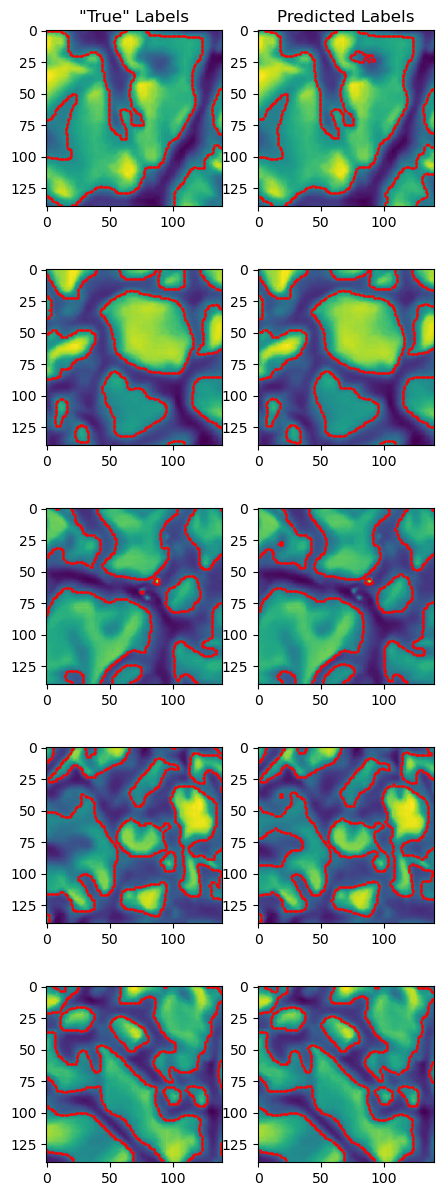

In [6]:
# Compute total validation accuracy
num_correct = 0
num_pixels = 0
for idx in range(396):
    true = np.load(f'../UNet1_outputs/true_{idx}.npy').astype(np.uint8)
    preds = np.squeeze(np.load(f'../UNet1_outputs/pred_{idx}.npy')).astype(np.uint8)
    num_correct += len(np.where(preds.flatten() == true.flatten())[0]) #(preds == y).sum()
    num_pixels += len(preds.flatten()) # torch.numel(preds)
print(f"Total validation accuracy: {num_correct/num_pixels*100:.2f}") 

# Display a random sample of images
import cv2
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(5, 2, figsize=(5, 15)); axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]
ax1.set_title('"True" Labels')
ax2.set_title('Predicted Labels')
for i in range(0, 9, 2):
    idx = np.random.randint(0, 396)
    im = np.load(f'../UNet1_outputs/x_{idx}.npy')
    true = np.load(f'../UNet1_outputs/true_{idx}.npy').astype(np.uint8)
    preds = np.squeeze(np.load(f'../UNet1_outputs/pred_{idx}.npy')).astype(np.uint8)
    true_edges = cv2.Canny(true, 0, 1)
    pred_edges = cv2.Canny(preds, 0, 1)
    x_true = np.where(true_edges!=0)[0]
    y_true = np.where(true_edges!=0)[1]
    x_pred = np.where(pred_edges!=0)[0]
    y_pred = np.where(pred_edges!=0)[1]
    axs[i].imshow(im)
    axs[i].scatter(y_true, x_true, s=0.5, color='red')
    axs[i+1].imshow(im)
    axs[i+1].scatter(y_pred, x_pred, s=0.5, color='red')


###### UNet3 (binary labels, normalized data)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import os
from PIL import Image
from torch.utils.data import Dataset, TensorDataset, DataLoader
from albumentations.pytorch import ToTensorV2
import torchvision 
import torchvision.transforms.functional as TF
from tqdm import tqdm
import torch.optim as optim

# Get the data, applying some transformations
batch_size = 16
train_ds = MyDataset(image_dir="../Data/UNetData/images/train", mask_dir="../Data/UNetData/seg_images_binary/train", norm=True)#, transform=train_transform)
train_loader = DataLoader(train_ds, batch_size=batch_size, num_workers=2, pin_memory=True, shuffle=True)
val_ds = MyDataset(image_dir="../Data/UNetData/images/val", mask_dir="../Data/UNetData/seg_images_binary/val", norm=True)#, transform=val_transform)
val_loader = DataLoader(val_ds, batch_size=batch_size, num_workers=2, pin_memory=True, shuffle=False)
funclib.check_inputs(train_ds, train_loader)

# Define model (as an instance of MyNeuralNet), loss function, and optimizer
model = MyUNet(in_channels=1, out_channels=1).to("cpu") # NOTE: FOR MULTICLASS, CHANGE OUT_CHANNELS TO NUM CLASSES!!!
#print('model: \n', model)
loss_fn = nn.BCEWithLogitsLoss() # NOTE: FOR MULTICLASS, USE CROSS ENTROPY LOSS!!!
optimizer = optim.Adam(model.parameters(), lr=1e-4)
load_model = False
if load_model:
    model.load_state_dict(torch.load("my_checkpoint.pth.tar")["state_dict"])

# Train
print('Training:')
num_epochs = 3
scaler = torch.cuda.amp.GradScaler() # Don't have cuda
for epoch in range(num_epochs):
    print(f'\tEpoch {epoch}')

    # Train
    train_fn(train_loader, model, optimizer, loss_fn, scaler) # call model

    # check accuracy 
    accuracy, dice_score = validate_binary(val_loader, model)
    print(f"\tGot accuracy {accuracy:.2f}) and dice score: {dice_score/len(val_loader)}")
    model.train() # set model back into train mode

# Save model 
torch.save(model.state_dict(), 'UNet3.pth')
print('Saving trained model as UNet3.pth')

# Load it back in and save results on validation data 
model = MyUNet()
model.load_state_dict(torch.load('../NN_storage/UNet3.pth'))
save_val_results(val_loader, save_dir='../UNet3_outputs')

Total validation accuracy: 95.69


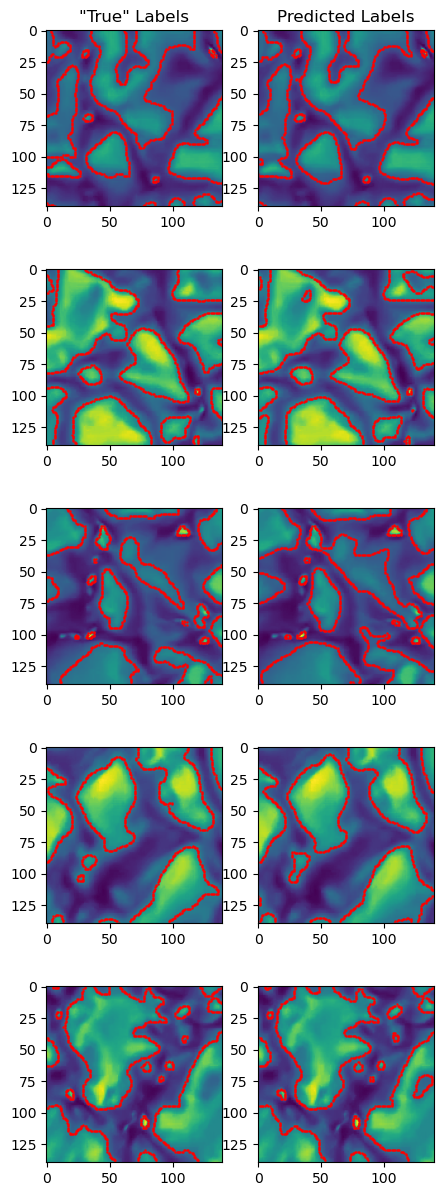

In [2]:
# Compute total validation accuracy
num_correct = 0
num_pixels = 0
for idx in range(396):
    true = np.load(f'../UNet3_outputs/true_{idx}.npy').astype(np.uint8)
    preds = np.squeeze(np.load(f'../UNet3_outputs/pred_{idx}.npy')).astype(np.uint8)
    num_correct += len(np.where(preds.flatten() == true.flatten())[0]) #(preds == true).sum()
    num_pixels += len(preds.flatten()) # torch.numel(preds)
print(f"Total validation accuracy: {num_correct/num_pixels*100:.2f}") 

# Display a random sample of images
import cv2
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(5, 2, figsize=(5, 15)); axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]
ax1.set_title('"True" Labels')
ax2.set_title('Predicted Labels')
for i in range(0, 9, 2):
    idx = np.random.randint(0, 396)
    im = np.load(f'../UNet3_outputs/x_{idx}.npy')
    true = np.load(f'../UNet3_outputs/true_{idx}.npy').astype(np.uint8)
    pred = np.squeeze(np.load(f'../UNet3_outputs/pred_{idx}.npy')).astype(np.uint8)
    true_edges = cv2.Canny(true, 0, 1)
    pred_edges = cv2.Canny(pred, 0, 1)
    x_true = np.where(true_edges!=0)[0]
    y_true = np.where(true_edges!=0)[1]
    x_pred = np.where(pred_edges!=0)[0]
    y_pred = np.where(pred_edges!=0)[1]
    axs[i].imshow(im)
    axs[i].scatter(y_true, x_true, s=0.5, color='red')
    axs[i+1].imshow(im)
    axs[i+1].scatter(y_pred, x_pred, s=0.5, color='red')


###### UNet4 (binary labels, multiple channels)

In [ ]:
# Get the data, applying some transformations
batch_size = 16
train_ds = MyDataset(image_dir="../Data/UNetData/images/train", mask_dir="../Data/UNetData/seg_images_binary/train", multichannel=True, channels=['gradx', 'grady'])
train_loader = DataLoader(train_ds, batch_size=batch_size, num_workers=2, pin_memory=True, shuffle=True)
val_ds = MyDataset(image_dir="../Data/UNetData/images/val", mask_dir="../Data/UNetData/seg_images_binary/val", multichannel=True, channels=['gradx', 'grady'])
val_loader = DataLoader(val_ds, batch_size=batch_size, num_workers=2, pin_memory=True, shuffle=False)
funclib.check_inputs(train_ds, train_loader)

# Define model (as an instance of MyNeuralNet), loss function, and optimizer
model = MyUNet(in_channels=3, out_channels=1).to("cpu")
loss_fn = nn.BCEWithLogitsLoss() 
optimizer = optim.Adam(model.parameters(), lr=1e-4)
load_model = False
if load_model:
    model.load_state_dict(torch.load("my_checkpoint.pth.tar")["state_dict"])

# Train
print('Training:')
num_epochs = 3
scaler = torch.cuda.amp.GradScaler() # Don't have cuda
for epoch in range(num_epochs):
    print(f'\tEpoch {epoch}')

    # Train
    train(train_loader, model, optimizer, loss_fn, scaler) # call model

    # check accuracy 
    accuracy, dice_score = validate_binary(val_loader, model)
    print(f"\tGot accuracy {accuracy:.2f}) and dice score: {dice_score/len(val_loader)}")
    model.train() # set model back into train mode

# Save model
torch.save(model.state_dict(), '../NN_storage/UNet4.pth')
print('Saving trained model as NN_storage/UNet4.pth')

# Load it back in and save results on validation data 
model = MyUNet()
model.load_state_dict(torch.load('../NN_storage/UNet4.pth'))
save_val_results(val_loader, save_dir='../UNet4_outputs')

Total validation accuracy: 97.55


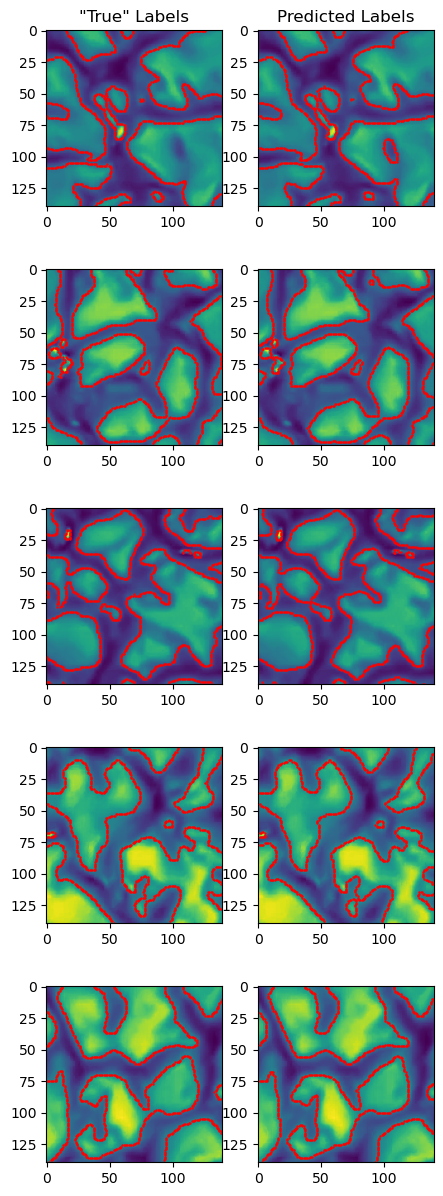

In [2]:
# Compute total validation accuracy
num_correct = 0
num_pixels = 0
for idx in range(396):
    true = np.load(f'../UNet4_outputs/true_{idx}.npy').astype(np.uint8)
    preds = np.squeeze(np.load(f'../UNet4_outputs/pred_{idx}.npy')).astype(np.uint8)
    num_correct += len(np.where(preds.flatten() == true.flatten())[0]) #(preds == true).sum()
    num_pixels += len(preds.flatten()) # torch.numel(preds)
print(f"Total validation accuracy: {num_correct/num_pixels*100:.2f}") 

# Display a random sample of images
import cv2
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(5, 2, figsize=(5, 15)); axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]
ax1.set_title('"True" Labels')
ax2.set_title('Predicted Labels')
for i in range(0, 9, 2):
    idx = np.random.randint(0, 396)
    im = np.load(f'../UNet4_outputs/x_{idx}.npy')[0] # first index to get image
    true = np.load(f'../UNet4_outputs/true_{idx}.npy').astype(np.uint8)
    pred = np.squeeze(np.load(f'../UNet4_outputs/pred_{idx}.npy')).astype(np.uint8)
    true_edges = cv2.Canny(true, 0, 1)
    pred_edges = cv2.Canny(pred, 0, 1)
    x_true = np.where(true_edges!=0)[0]
    y_true = np.where(true_edges!=0)[1]
    x_pred = np.where(pred_edges!=0)[0]
    y_pred = np.where(pred_edges!=0)[1]
    axs[i].imshow(im)
    axs[i].scatter(y_true, x_true, s=0.5, color='red')
    axs[i+1].imshow(im)
    axs[i+1].scatter(y_pred, x_pred, s=0.5, color='red')

###### UNet2 (four-valued labels)

In [ ]:
# Get the data, applying some transformations (Should pull segs and truths correctly based on their positions in the directories)
batch_size = 16
train_ds = MyDataset(image_dir="../Data/UNetData/images/train", mask_dir="../Data/UNetData/seg_images/train", n_classes=4)
train_loader = DataLoader(train_ds, batch_size=batch_size, num_workers=2, pin_memory=True, shuffle=True)
val_ds = MyDataset(image_dir="../Data/UNetData/images/val", mask_dir="../Data/UNetData/seg_images/val", n_classes=4)
val_loader = DataLoader(val_ds, batch_size=batch_size, num_workers=2, pin_memory=True, shuffle=False)
funclib.check_inputs(train_ds, train_loader)

# Define model (as an instance of MyNeuralNet), loss function, and optimizer
model = MyUNet(in_channels=1, out_channels=4).to("cpu")
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
load_model = False
if load_model:
    model.load_state_dict(torch.load("my_checkpoint.pth.tar")["state_dict"])

# Train
print('Training:')
num_epochs = 3
scaler = torch.cuda.amp.GradScaler() # Don't have cuda
for epoch in range(num_epochs):
    print(f'\tEpoch {epoch}')

    # Train
    train_fn(train_loader, model, optimizer, loss_fn, scaler) # call model

    # check accuracy 
    accuracy, dice_score = validate_multiclass(val_loader, model)
    print(f"\tGot accuracy {accuracy:.2f}) and dice score: {dice_score/len(val_loader)}")
    model.train() # set model back into train mode

# Save model 
torch.save(model.state_dict(), '../NN_storage/UNet2.pth')
print('Saving trained model as UNet2.pth')

# Load it back in and save results on validation data 
model = MyUNet()
model.load_state_dict(torch.load('../NN_storage/UNet2.pth'))
save_val_results(val_loader, save_dir='../UNet2_outputs')


Total validation accuracy: 96.48%
	99.39% of intergranule pixels correctly identified
	1.06% of dim middle pixels correctly identified
	95.15% of granule pixels correctly identified
	1.98% of bright point pixels correctly identified
JUST GETS HIGH TOTAL ACCURACY BECAUSE SAYS EVERYTHING IS GR OR IG!
MUST WEIGHT LOSS FUNCTION TO PENALIZE MORE FOR INCORRECT DM/BP


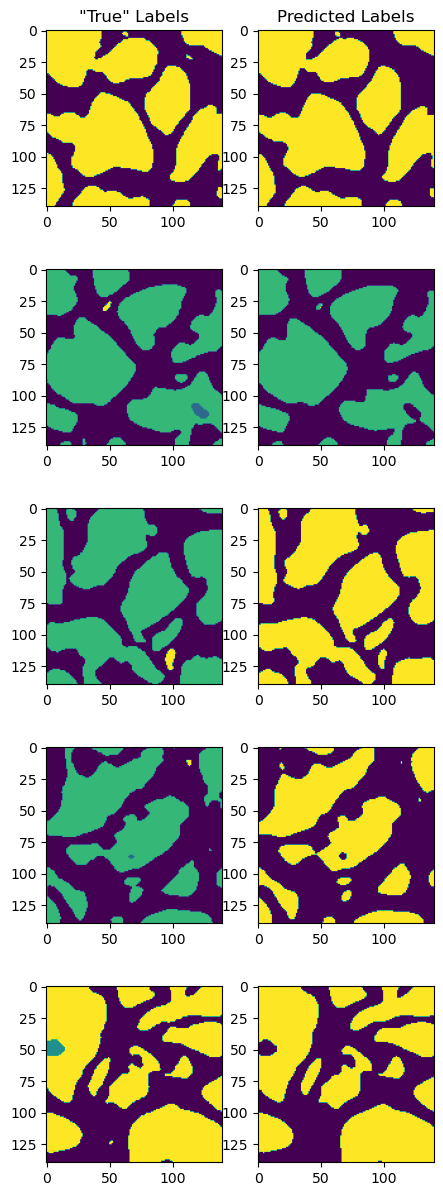

In [7]:
# Compute total validation accuracy
pix_correct, ig_correct, dm_correct, gr_correct, bp_correct = 0, 0, 0, 0, 0
tot_pix, tot_ig, tot_dm, tot_gr, tot_bp = 0, 0, 0, 0, 0
for idx in range(396):
    true = np.load(f'../UNet2_outputs/true_{idx}.npy')
    preds = np.squeeze(np.load(f'../UNet2_outputs/pred_{idx}.npy'))
    pix_correct += len(np.where(preds.flatten() == true.flatten())[0]) #(preds == true).sum()
    tot_pix += len(preds.flatten()) # torch.numel(preds)
    ig_correct += len(np.where((preds.flatten() == true.flatten()) & (true.flatten() == 0))[0])
    tot_ig += len(np.where(true.flatten() == 0)[0])
    dm_correct += len(np.where((preds.flatten() == true.flatten()) & (true.flatten() == 0.5))[0])
    tot_dm += len(np.where(true.flatten() == 0.5)[0])
    gr_correct += len(np.where((preds.flatten() == true.flatten()) & (true.flatten() == 1))[0])
    tot_gr += len(np.where(true.flatten() == 1)[0])
    bp_correct += len(np.where((preds.flatten() == true.flatten()) & (true.flatten() == 1.5))[0])
    tot_bp += len(np.where(true.flatten() == 1.5)[0])

print(f"Total validation accuracy: {pix_correct/tot_pix*100:.2f}%") 
print(f'\t{ig_correct/tot_ig*100:.2f}% of intergranule pixels correctly identified')
print(f'\t{dm_correct/tot_dm*100:.2f}% of dim middle pixels correctly identified')
print(f'\t{gr_correct/tot_gr*100:.2f}% of granule pixels correctly identified')
print(f'\t{bp_correct/tot_bp*100:.2f}% of bright point pixels correctly identified')

# Display a random sample of images
import cv2
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(5, 2, figsize=(5, 15)); axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]
ax1.set_title('"True" Labels')
ax2.set_title('Predicted Labels')
for i in range(0, 9, 2):
    idx = np.random.randint(0, 396)
    im = np.load(f'../UNet2_outputs/x_{idx}.npy')[0] # first index to get image
    true = np.load(f'../UNet2_outputs/true_{idx}.npy')
    preds = np.squeeze(np.load(f'../UNet2_outputs/pred_{idx}.npy'))
    axs[i].imshow(true)
    axs[i+1].imshow(preds)
 

###### UNet5 (four-valued labels, higher weights on DM, BP)

In [17]:
'''
Ok, so not wieghting (just using MSE) does even worse than using crossentropyloss
Things to try: 
    - Using a weight of 3 for both doesnt help much at all
    - Using a weight of 10 for both just reduces GR and IG accuracy, doesnt help BP and DM accuracy (especially DM, BP does do a bit better) so total acc pretty bad
    - Even more so for 20
    - Raising them both higher and and also making dm more than bp (dm_weight=60, bp_weight=40) -> WTF.Doing that makes the accuracy and bp and dm like zero... 
Lets try adding input layer that brings out bp, dm??
    - Seems to be sort of helpfull? Gets like 11% acc on bps.Wait weird - training with sqaured again goes back to similar acc as with on layer, e.g. like near zero bp, dm acc
        Ok current UNet5 is with squared only, but not super usefull   
    - Try even more contrast by adding sqaured and fifth power? ---> NO! GIVES TERRIBLE TOTAL ACCURACY AND NEAR ZERO BP, DM ACCURACY
    - What about just fith? Still same level of terrible
    - Same for 7th (saved as UNet6)
    - Weird idea - use diff between binary seg output and inputs as second layer?
        Like, train it on a two (or three if perhaps scaling more does get bp) value seg, then took the difference of 
        that seg and the truths and used that as an input layer to train another model? Wouldnt be using truth values to train or anything. 
        Would that be sort of similar to "unsupervised NN" idea, where it reconstructs inputs using predictions, uses diff between those
        and true inputs to train?
        Ok, to do this I would need to rerun UNet1 and save the training preds to get the binary NN segs for the training data, cuase I've only saved them
        for the val data as of yet. Wait no! Dont want to save the preds it gets on the training data while training, but the preds that the fully trained
        model would make on the training preds. Or wait.. but those would probabaly be overfit to. Perhaps really I need to just use the validation outputs from UNet1
        as the training data for this UNet (both the imgs and the deltaBinImgs). And then I cant use that as the val data, so maybe use the train data my val data?
        Unfortunately, I did split them asymetrically, so there are 953 train files and 397 val files. 
        Lets not so this - on talking to Kevin it seems like maybe sort of too contrived
    - Kevin suggested using histogram normalization (not histogram matching) as a layer to perhaps bring out dm... but on looking at the results of
        applying this (as per Kevin's algorithm) seems like it might not be that usefull
Lets try training on new data (real data, with segmentations from segment_array_v2)! And also perhaps with some wieghting
    - BUT V2 NPY IMAGES ARE LIKE 4X AS BIG AS OTHERS, SO TAKES A HELL OF A LONG TIME 
    - Could cut them down. Or just cutting down batch size would result in traiing on same num pixels 
    - BUT probably should cut them down, since cutting batch size would mean most batches are like mostly the same image (less diverse)
    - Wait, still takes a very long time..
    - Maybe cuase theres just so many images? Lets just train on a subset
    - Save as UNet7
Huh.. does the similar to before (maybe worse?) where it does good on GR vs IG but terrible on others 
Tried on just binary data too and it does definitely way worse than trained on first light does
    - Save as UNet8
Ok, Benoit suggests training to just do IG, GR, BP
That does terrible. I wonder if its my custom loss function?
Lets try going going back to normal cross entropy loss
    - Save as UNet9
That works great on the GR, IG. Maybe it is my loss function? Can I weight with the built in? Yes I can!
    - try that with bp_wieght = 10
    - Save as UNet10
Wow that works great! so it is the loss function. Perhaps even getting too many. lets try agian with all 4 classes and a bit lower weight?
    - save as UNet11 (use bp_weight = dm_weight = 7)
Wow that works great too! Maybe a little too much weighting on both dm and bp (more so on dm). lets try 4 for dm, 5 for bp?
    - save as UNet11
Now lets see if we can do the same thing but train on real data? 
    - wait that probably wont work though since didnt work well on binary 
    - save as UNet12
    - Yeah I mean it does ok given the crappy true labels
And training on simulation (MURaM) data?
    - save as UNet13
'''

UNet_name = 'UNet13'
n_classes = 4
multichannel = False
imdir = "../Data/UNetData_MURaM/images/"
segdir = "../Data/UNetData_MURaM/seg_images/"
in_channels = 1
bp_weight = 5
dm_weight = 4
loss_fn = nn.CrossEntropyLoss(weight=torch.tensor([1,dm_weight,1,bp_weight])) #funclib.multiclass_MSE_loss() # nn.BCEWithLogitsLoss() #
load_model = False
num_epochs = 3 

# Get the data, applying some transformations (Should pull segs and truths correctly based on their positions in the directories)
batch_size = 16
train_ds = funclib.MyDataset(image_dir=f"{imdir}train", mask_dir=f"{segdir}train", n_classes=n_classes, multichannel=multichannel) # multichannel=True, channels=['deltaBinImg'], 
train_loader = DataLoader(train_ds, batch_size=batch_size, num_workers=2, pin_memory=True, shuffle=True)
val_ds = funclib.MyDataset(image_dir=f"{imdir}val", mask_dir=f"{segdir}val", n_classes=n_classes, multichannel=multichannel) # multichannel=True, channels=['deltaBinImg'],
val_loader = DataLoader(val_ds, batch_size=batch_size, num_workers=2, pin_memory=True, shuffle=False)
funclib.check_inputs(train_ds, train_loader)

# Define model (as an instance of MyNeuralNet), loss function, and optimizer
model = funclib.MyUNet(in_channels, out_channels=n_classes).to("cpu")
optimizer = optim.Adam(model.parameters(), lr=1e-4)
if load_model: 
    model.load_state_dict(torch.load("../NN_storage/UNET_checkpoint.pth.tar")["state_dict"])

# Train
print('Training:')
scaler = torch.cuda.amp.GradScaler() # Don't have cuda
for epoch in range(num_epochs):
    print(f'\tEpoch {epoch}')

    # Train and save snapshot of this epoch's training, in case it crashes while training next one
    funclib.train_UNET(train_loader, model, optimizer, loss_fn, scaler, dm_weight=dm_weight, bp_weight=bp_weight) # call model
    state = {"state_dict": model.state_dict(), "optimizer":optimizer.state_dict(),}
    torch.save(state, "../NN_storage/UNET_checkpoint.pth.tar"); print(f'\tSaving checkpoint to ../NN_storage/UNET_checkpoint.pth.tar')

    # check accuracy 
    accuracy, dice_score = funclib.validate_UNET(val_loader, model)
    print(f"\tGot accuracy {accuracy:.2f} and dice score: {dice_score/len(val_loader)}")
    model.train() # set model back into train mode

# Save model 
torch.save(model.state_dict(), f'../NN_storage/{UNet_name}.pth')
print(f'Saving trained model as {UNet_name}.pth')

# Load it back in and save results on validation data 
model = funclib.MyUNet(in_channels, out_channels=n_classes)
model.load_state_dict(torch.load(f'../NN_storage/{UNet_name}.pth'))
funclib.save_UNET_results(val_loader, save_dir=f'../{UNet_name}_outputs', model=model)



Train data:
     843 obs, broken into 53 batches
     Each batch has data of shape torch.Size([16, 1, 76, 76]), e.g. 16 images, [76, 76] pixels each, 1 layers (features)
     Each batch has labels of shape torch.Size([16, 4, 76, 76]), e.g. 16 images, [76, 76] pixels each, 4 layers (classes)









Training:
	Epoch 0


100%|██████████| 53/53 [03:16<00:00,  3.71s/it, loss=0.632]


	Saving checkpoint to ../NN_storage/UNET_checkpoint.pth.tar
	Got accuracy 87.55 and dice score: 1.8395734202739302
	Epoch 1


100%|██████████| 53/53 [03:27<00:00,  3.91s/it, loss=0.546]


	Saving checkpoint to ../NN_storage/UNET_checkpoint.pth.tar
	Got accuracy 87.63 and dice score: 1.842136890943224
	Epoch 2


100%|██████████| 53/53 [03:15<00:00,  3.70s/it, loss=0.436]


	Saving checkpoint to ../NN_storage/UNET_checkpoint.pth.tar
	Got accuracy 86.52 and dice score: 1.8353771071022196
Saving trained model as UNet13.pth









Loading model back in, saving results on validation data in ../UNet13_outputs


UNet: UNet13
Total validation accuracy: 88.82%
	84.28419341771152% of intergranule pixels correctly identified
	50.323578356390044% of dim middle pixels correctly identified
	93.32656484439849% of granule pixels correctly identified
	78.5753727222529% of bright point pixels correctly identified


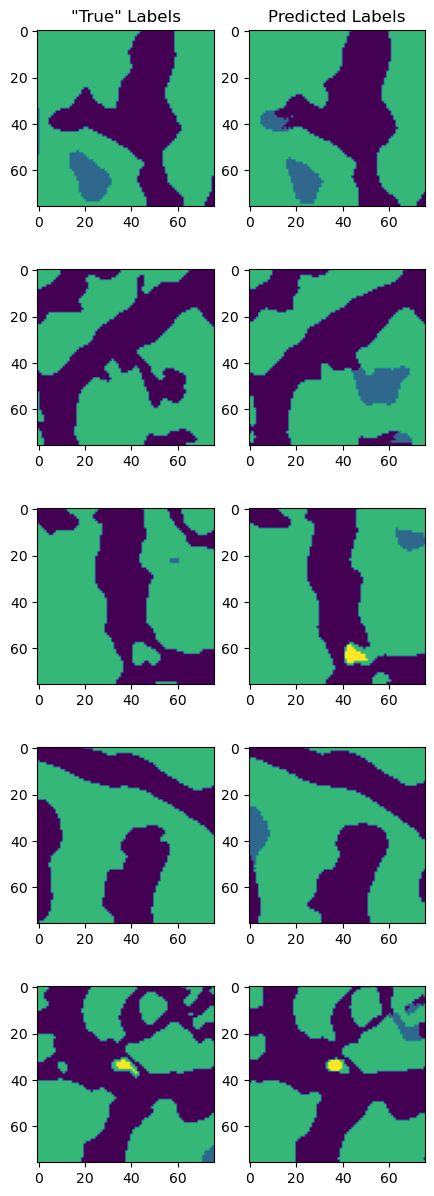

In [19]:
UNet_name = 'UNet13'
n_classes = 4

# Compute total validation accuracy
output_dir = f'../{UNet_name}_outputs'
pct_correct, pct_ig_correct, pct_dm_correct, pct_gr_correct, pct_bp_correct = funclib.compute_validation_results(output_dir, n_classes)
print(f'UNet: {UNet_name}')
print(f"Total validation accuracy: {pct_correct:.2f}%") 
print(f'\t{pct_ig_correct}% of intergranule pixels correctly identified')
print(f'\t{pct_dm_correct}% of dim middle pixels correctly identified')
print(f'\t{pct_gr_correct}% of granule pixels correctly identified')
print(f'\t{pct_bp_correct}% of bright point pixels correctly identified')

# Display a random sample of images
import cv2
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(5, 2, figsize=(5, 15)); axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]
ax1.set_title('"True" Labels')
ax2.set_title('Predicted Labels')
for i in range(0, 9, 2):
    idx = np.random.randint(0, 396)
    im = np.load(f'{output_dir}/x_{idx}.npy')[0] # first index to get image
    true = np.load(f'{output_dir}/true_{idx}.npy')
    preds = np.squeeze(np.load(f'{output_dir}/pred_{idx}.npy'))
    axs[i].imshow(true, vmin=0, vmax=1.5)
    axs[i+1].imshow(preds, vmin=0, vmax=1.5)

#### FINAL WNet

###### WNet classes and Functions

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import torch.nn as nn
import os
from PIL import Image
import torch
from torch.utils.data import Dataset, TensorDataset, DataLoader
from albumentations.pytorch import ToTensorV2
import torchvision 
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF
import torch.optim as optim
import torch.nn.functional as F
from tqdm import tqdm
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import time
import funclib
import importlib
importlib.reload(funclib)

### WNET ###
    # - OG paper https://arxiv.org/abs/1711.08506 (code from OG https://github.com/taoroalin/WNet)
    # - Reproduces OG paper, adding usefull things https://aswali.github.io/WNet/ (see comments in block and uncoder classes. they also train differently)
    # - Another reproduction (uses different n_cut_loss): https://github.com/valorcurse/W-Net-Pytorch/wiki/W-Net-Reproduction
    # - And another (this is where above gets there n_cut_loss): https://github.com/gr-b/W-Net-Pytorch/blob/master/soft_n_cut_loss.py


model_dict = {
    'WNet1':'binary, 1 channel, no smooth loss',
    'WNet1m':'binary, 1 channel, no smooth loss', # Using MuRAM (so v2 seg, although thats not relevant since unsup)
    'WNet2':'4 classes, 1 channel, no smooth loss', 
    'WNet2m': 'binary, 1 channel, smooth loss',
    'WNet3':'binary, 1 channel, smooth loss (but bad weighting)',
    'WNet4m':'binary, 1 channel, smooth loss', 
    'WNet5':'3 classes, 2 channels (X, X**3), smooth loss', # trained on d, tested on m
    'WNet6':'3 classes, 4 channels (X, X**3, grad_x, grad_y), smooth loss', # trained on d, tested on m
    'WNet7':'3 classes, 4 channels (X, X**4, grad_x, grad_y), smooth loss', 
    'WNet8':'binary, 2 channels (X, X*2), smooth loss', 
    'WNet8m': 'binary, 2 channels (X, X**2), smooth loss',
    'WNet9':'', 
    'WNet10':'4 classes, 4 channels (X, X**3, grad_x, grad_y), smooth loss',
    'WNet11':'4 classes, 1 channel, smooth loss',
    'WNet12':'3 classes, 1 channel, smooth loss', # trained on d, tested on m
    'FreezeNet1': '1 epoch sup, 2 epoch unsup, 3 classes, 1 channels, smooth loss',
    'FreezeNet2': '1 epoch sup, 2 epoch unsup, 3 classes, 2 channels (X, X*2), smooth loss',
    'FreezeNet3': '2 epoch sup, NO unsup, 3 classes, 2 channels (X, X*2), smooth loss',
    'FreezeNet4': '1 epoch sup W/O decoder, 2 epoch unsup, 3 classes, 2 channels (X, X*2), smooth loss',
    'WNet13': '4 classes, 3 channels (X, X**3, smoothed), smooth loss',
    'WNet14m': '3 classes, 3 channels (X, X**2, binary_residual), smooth loss',
    'WNet15m': '3 classes, timeseries (+/-20 w/ 5 imgs), smooth loss',
    'WNet16m': '3 classes, timeseries (+/-40 w/ 5 imgs), smooth loss',
    'WNet17m': '3 classes, timeseries (+/-40 w/ 9 imgs), smooth loss', # didn't actually run?
    'WNet19m': '3 classes, 2 channels (X, mag)',
    'WNet20m': '3 classes, 2 channel (X, mag**2)',
    'WNet21m': '3 classes, 1 channel (mag**2 NO X!)',
    'WNet22m': '3 classes, 2 channels (X, mag**2), 2x MSE for mag**2, smooth loss', 
    'WNet23m': '3 classes, 2 channels (X, mag**2), 2x MSE for mag**2, more smooth loss', # why do I only have 1 epoch of this?
    'WNet24d': '3 classes, timeseries (+/-20, and DKIST28 so dt=6 w/ 5 imgs), smooth loss',
    'WNet25m': '3 classes, 2 channels (X, mag**2), 2x MSE for mag**2, more smooth loss, blob loss',
    'WNet26m': '3 classes, 2 channels (X, mag**2), 2x MSE for mag**2, more smooth loss, less blob loss', # but really probabaly just need another loss term...
    'WNet27': '3 classes, 2 channels (X, X-med30), more smooth loss, less blob loss',
    'WNet28': '3 classes, 2 channels (X, X-med30), more smooth loss, no blob loss',
    'WNet29nm':'3 classes, 1 channel, smooth loss',  # n = PROPERLY NORMALIZED
    'UNet30nm':'3 classes, 1 channel, smooth loss',  # n = PROPERLY NORMALIZED - THIS IS A UNET
    'WNet31nm':'3 classes, 1 channel, smooth loss, reflect',  # n = PROPERLY NORMALIZED, reflect = REFLECT PADDING_MODE
    'WNet33nm':'3 classes, 2 channels (X, X-med8), smooth loss, reflect', # n = n = PROPERLY NORMALIZED 
    'WNet34nm':'3 classes, 2 channels (X, X-med8), smooth loss, reflect', # but residual scaled using total mean, sd
    'WNet35nm':'3 classes, 2 channels (X, X-med8), 4x MSE for X-med8, smooth loss, reflect', # residual scaled using total mean, sd
    }   


/home/lzucker1/miniconda3/envs/general/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
import funclib
import importlib
importlib.reload(funclib)

WNet_name = 'WNet35nm'
n_classes = 3 #
channels = ['X', 'median_residual'] # ['X', 'Bz']# ['timeseries40_5'] # ['X', 'Bz'] # ['timeseries20_5'] # ['timeseries40_9'] # ['X', 'power2', 'binary_residual'] 
weights = [1, 4] #[1, 4] # weight channels differently in the rec loss (mse loss)
# imdir = '../Data/UNetData_v2_subset/norm_images/' # "../Data/UNetData_MURaM/images/" # "../Data/UNetData_DKIST_TSeries/images/" #"../Data/UNetData_MURaM_TSeries40/images/" 
# segdir =  '../Data/UNetData_v2_subset/seg_images/' # "../Data/UNetData_MURaM/seg_images/" # "../Data/UNetData_DKIST_TSeries/seg_images/" #"../Data/UNetData_MURaM_TSeries40/seg_images/" # why did i use full UNetData, and not v2, for the other WNets? MURaM is v2
imdir =  "../Data/UNetData_MURaM/norm_images/" 
segdir =  "../Data/UNetData_MURaM/seg_images/" 
im_size = 128  # [5, 10, 20, 40, 80, 160] or [4, 8, 16, 32, 64, 128]
randomSharp = False
smooth_loss = True
blob_loss = False
padding_mode = 'reflect'
load_model = False
num_epochs = 3 
num_sup = 0 
freeze_dec = False # freeze decoder during sup training of encoder
in_channels = int(channels[0][channels[0].find('_')+1:]) if channels[0].startswith('time') else len(channels)
target_pos = int(np.floor(in_channels/2)) if channels[0].startswith('time') else 0 # position of target within channels axis
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Get the data
batch_size = 16
print(WNet_name)
train_ds = funclib.MyDataset(image_dir=imdir, mask_dir=segdir, set='train', norm=False, n_classes=n_classes, channels=channels, randomSharp=randomSharp, im_size=im_size) # multichannel=True, channels=['deltaBinImg'], 
train_loader = DataLoader(train_ds, batch_size=batch_size, num_workers=2, pin_memory=True, shuffle=True)
val_ds = funclib.MyDataset(image_dir=imdir, mask_dir=segdir, set='val', norm=False, n_classes=n_classes, channels=channels, randomSharp=randomSharp, im_size=im_size) # multichannel=True, channels=['deltaBinImg'],
val_loader = DataLoader(val_ds, batch_size=batch_size, num_workers=2, pin_memory=True, shuffle=False)
funclib.check_inputs(train_ds, train_loader, savefig=False, name=WNet_name)

# Define model, optimizer, and transforms
# squeeze (k) is "classes" in seg predicted by dec - why would we ever not want this to be n_classes? some source says paper probabaly uses k=20, but they are doing binary predictions...????
# out_channels is channels for the final img (not classes for seg), so want same as in_channels, right?
model = funclib.MyWNet(squeeze=n_classes, ch_mul=64, in_chans=in_channels, out_chans=in_channels, padding_mode=padding_mode).to(device)
learning_rate = 0.003
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Run for every epoch
n_cut_losses_avg = []
rec_losses_avg = []
print('Training')
for epoch in range(num_epochs):

    train_enc_sup = True if epoch < num_sup else False
    if epoch >= num_sup: freeze_dec = False
    print(f'\tEpoch {epoch}, ({f"supervised, freeze_dec={freeze_dec}" if train_enc_sup==True else f"unsupervised, freeze_dec={freeze_dec}"})')

    # Train (returning losses)
    enc_losses, rec_losses = funclib.train_WNet(train_loader, model, optimizer, k=n_classes, img_size=(im_size, im_size), WNet_name=WNet_name, smooth_loss=smooth_loss, blob_loss=blob_loss, epoch=epoch,  device=device, train_enc_sup=train_enc_sup, freeze_dec=freeze_dec, target_pos=target_pos, weights=weights)

    # # check accuracy 
    # accuracy, dice_score = validate(val_loader, model)
    # print(f"\tGot accuracy {accuracy:.2f} and dice score: {dice_score/len(val_loader)}")
    # model.train() # set model back into train mode

# Add losses to avg losses
n_cut_losses_avg.append(torch.mean(torch.FloatTensor(enc_losses)))
rec_losses_avg.append(torch.mean(torch.FloatTensor(rec_losses)))

# images, labels = next(iter(dataloader))
# enc, dec = wnet(images)

# Save model 
torch.save(model.state_dict(), f'../NN_storage/{WNet_name}.pth')
print(f'Saving trained model as {WNet_name}.pth, and saving average losses')
np.save(f'../NN_outputs/{WNet_name}_n_cut_losses', n_cut_losses_avg)
np.save(f'../NN_outputs/{WNet_name}_rec_losses', rec_losses_avg)

# Load it back in and save results on validation data 
model = funclib.MyWNet(squeeze=n_classes, ch_mul=64, in_chans=in_channels, out_chans=in_channels, padding_mode=padding_mode)
model.load_state_dict(torch.load(f'../NN_storage/{WNet_name}.pth'))
funclib.save_WNET_results(val_loader, save_dir=f'../NN_outputs/{WNet_name}_outputs', model=model, target_pos=target_pos)

WNet35nm
Train data:
     1890 obs, broken into 119 batches
     Each batch has data of shape torch.Size([16, 2, 128, 128]), e.g. 16 images, [128, 128] pixels each, 2 layers (features)
     Each batch has labels of shape torch.Size([16, 3, 128, 128]), e.g. 16 images, [128, 128] pixels each, 3 layers (classes)
Training
	Epoch 0, (unsupervised, freeze_dec=False)
	Epoch 1, (unsupervised, freeze_dec=False)
	Epoch 2, (unsupervised, freeze_dec=False)
Saving trained model as WNet35nm.pth, and saving average losses
Loading model back in, saving results on validation data in ../NN_outputs/WNet35nm_outputs


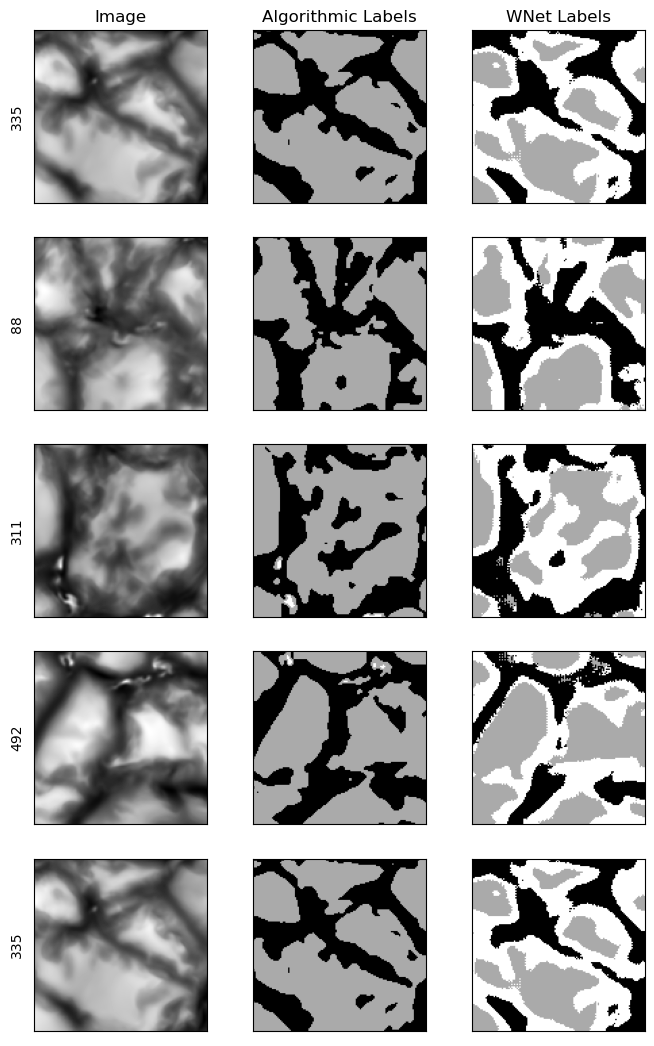

In [7]:
# Display a random sample of images

WNet_name = 'WNet35nm'
import cv2
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14, ax15)) = plt.subplots(5, 3, figsize=(8, 13)); axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15]
ax1.set_title('Image')
ax2.set_title('Algorithmic Labels')
ax3.set_title('WNet Labels')
output_dir = f'../NN_outputs/{WNet_name}_outputs'
target_pos = 2 if (WNet_name=='WNet15m' or WNet_name=='WNet16m') else 0
for i in range(0, 14, 3):
    idx = np.random.randint(0, len([file for file in os.listdir(output_dir) if file.startswith('x')]))
    im = np.load(f'{output_dir}/x_{idx}.npy')[target_pos]
    true = np.load(f'{output_dir}/true_{idx}.npy')
    preds = np.squeeze(np.load(f'{output_dir}/pred_{idx}.npy'))
    axs[i].imshow(im, cmap='gist_gray'); axs[i].set_ylabel(idx)
    axs[i+1].imshow(true, vmin=0, vmax=1.5, cmap='gist_gray')
    axs[i+2].imshow(preds, vmin=0, vmax=1.5, cmap='gist_gray')
    axs[i].xaxis.set_tick_params(labelbottom=False); axs[i].yaxis.set_tick_params(labelleft=False); axs[i].set_xticks([]); axs[i].set_yticks([])
    axs[i+1].xaxis.set_tick_params(labelbottom=False); axs[i+1].yaxis.set_tick_params(labelleft=False); axs[i+1].set_xticks([]); axs[i+1].set_yticks([])
    axs[i+2].xaxis.set_tick_params(labelbottom=False); axs[i+2].yaxis.set_tick_params(labelleft=False); axs[i+2].set_xticks([]); axs[i+2].set_yticks([])
plt.savefig(f'../NN_outputs/{WNet_name}_val_examples')

106


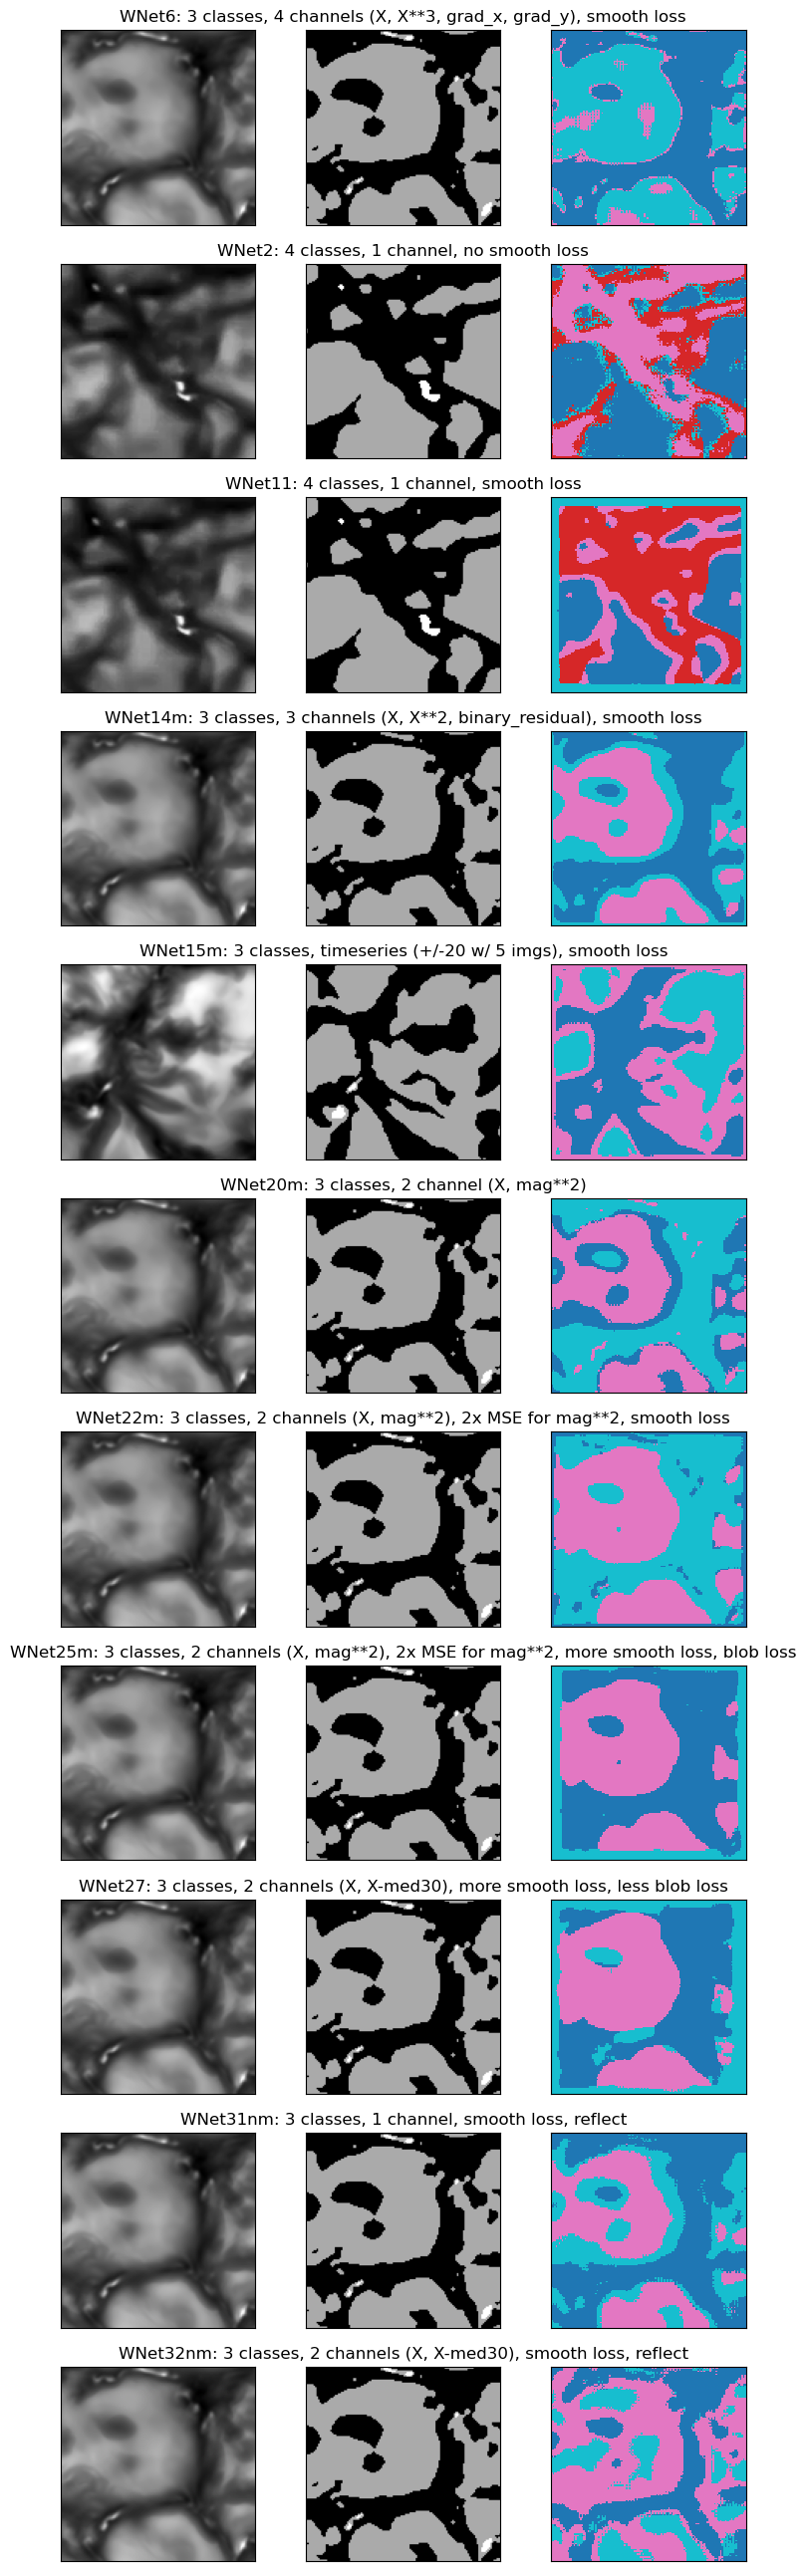

In [5]:
'''
Compare models
'''

idx = np.random.randint(0, 108)
print(idx) # 131 # 131 is good image for full DKIST seg v1 (Data/UNetData). HOWEVER note that "true" seg here is still version 1. Does not matter for training unsup, but perhaps for comparing validations.                                       #161 # np.random.randint(0, 250) 
#models = ['WNet1','WNet1m', 'WNet8', 'WNet12', 'WNet5', 'WNet6', 'WNet7', 'WNet2','WNet11','WNet10','WNet13', 'WNet14m','WNet15m', 'FreezeNet1', 'FreezeNet2', 'FreezeNet3','FreezeNet4']
models = ['WNet6', 'WNet2','WNet11', 'WNet14m','WNet15m', 'WNet20m','WNet22m', 'WNet25m', 'WNet27', 'WNet31nm','WNet32nm']
#models = ['WNet1m', 'WNet2m', 'WNet8m'] # Binary models 
#models = ['WNet12','WNet5','WNet6'] # 3 class models 
#models = ['WNet15m','WNet16m'] # 3 class T series models 
#models = ['WNet19m','WNet22m','WNet25m','WNet26m'] # 3 class mag models
fig, axs = plt.subplots(len(models), 3, figsize=(9, 3*len(models)))
for i in range(len(models)):
    output_dir = f'../NN_outputs/{models[i]}_outputs'
    target_pos = 2 if models[i]=='WNet15m' else 0
    im = np.load(f'{output_dir}/x_{idx}.npy')[target_pos] # index to get image
    true = np.load(f'{output_dir}/true_{idx}.npy')
    preds = np.squeeze(np.load(f'{output_dir}/pred_{idx}.npy'))
    if int(preds[40, 60]) == 0: # kinds try to mostly have black be zero
        preds_copy = np.copy(preds)
        preds[preds_copy == 0.0] = 1
        preds[preds_copy == 1.0] = 0 
    axs[i,1].set_title(f'{models[i]}: {model_dict[models[i]]}')
    axs[i,0].imshow(im, cmap='gist_gray')
    axs[i,1].imshow(true, vmin=0, vmax=1.5, cmap='gist_gray')
    axs[i,2].imshow(preds, vmin=0, vmax=1.5, interpolation='none', cmap='tab10') #cmap='gist_gray')#cmap='tab10')
    axs[i,0].xaxis.set_tick_params(labelbottom=False); axs[i,0].yaxis.set_tick_params(labelleft=False); axs[i,0].set_xticks([]); axs[i,0].set_yticks([])
    axs[i,1].xaxis.set_tick_params(labelbottom=False); axs[i,1].yaxis.set_tick_params(labelleft=False); axs[i,1].set_xticks([]); axs[i,1].set_yticks([])
    axs[i,2].xaxis.set_tick_params(labelbottom=False); axs[i,2].yaxis.set_tick_params(labelleft=False); axs[i,2].set_xticks([]); axs[i,2].set_yticks([])
plt.savefig('ExamplePredictions_OneImage.png')

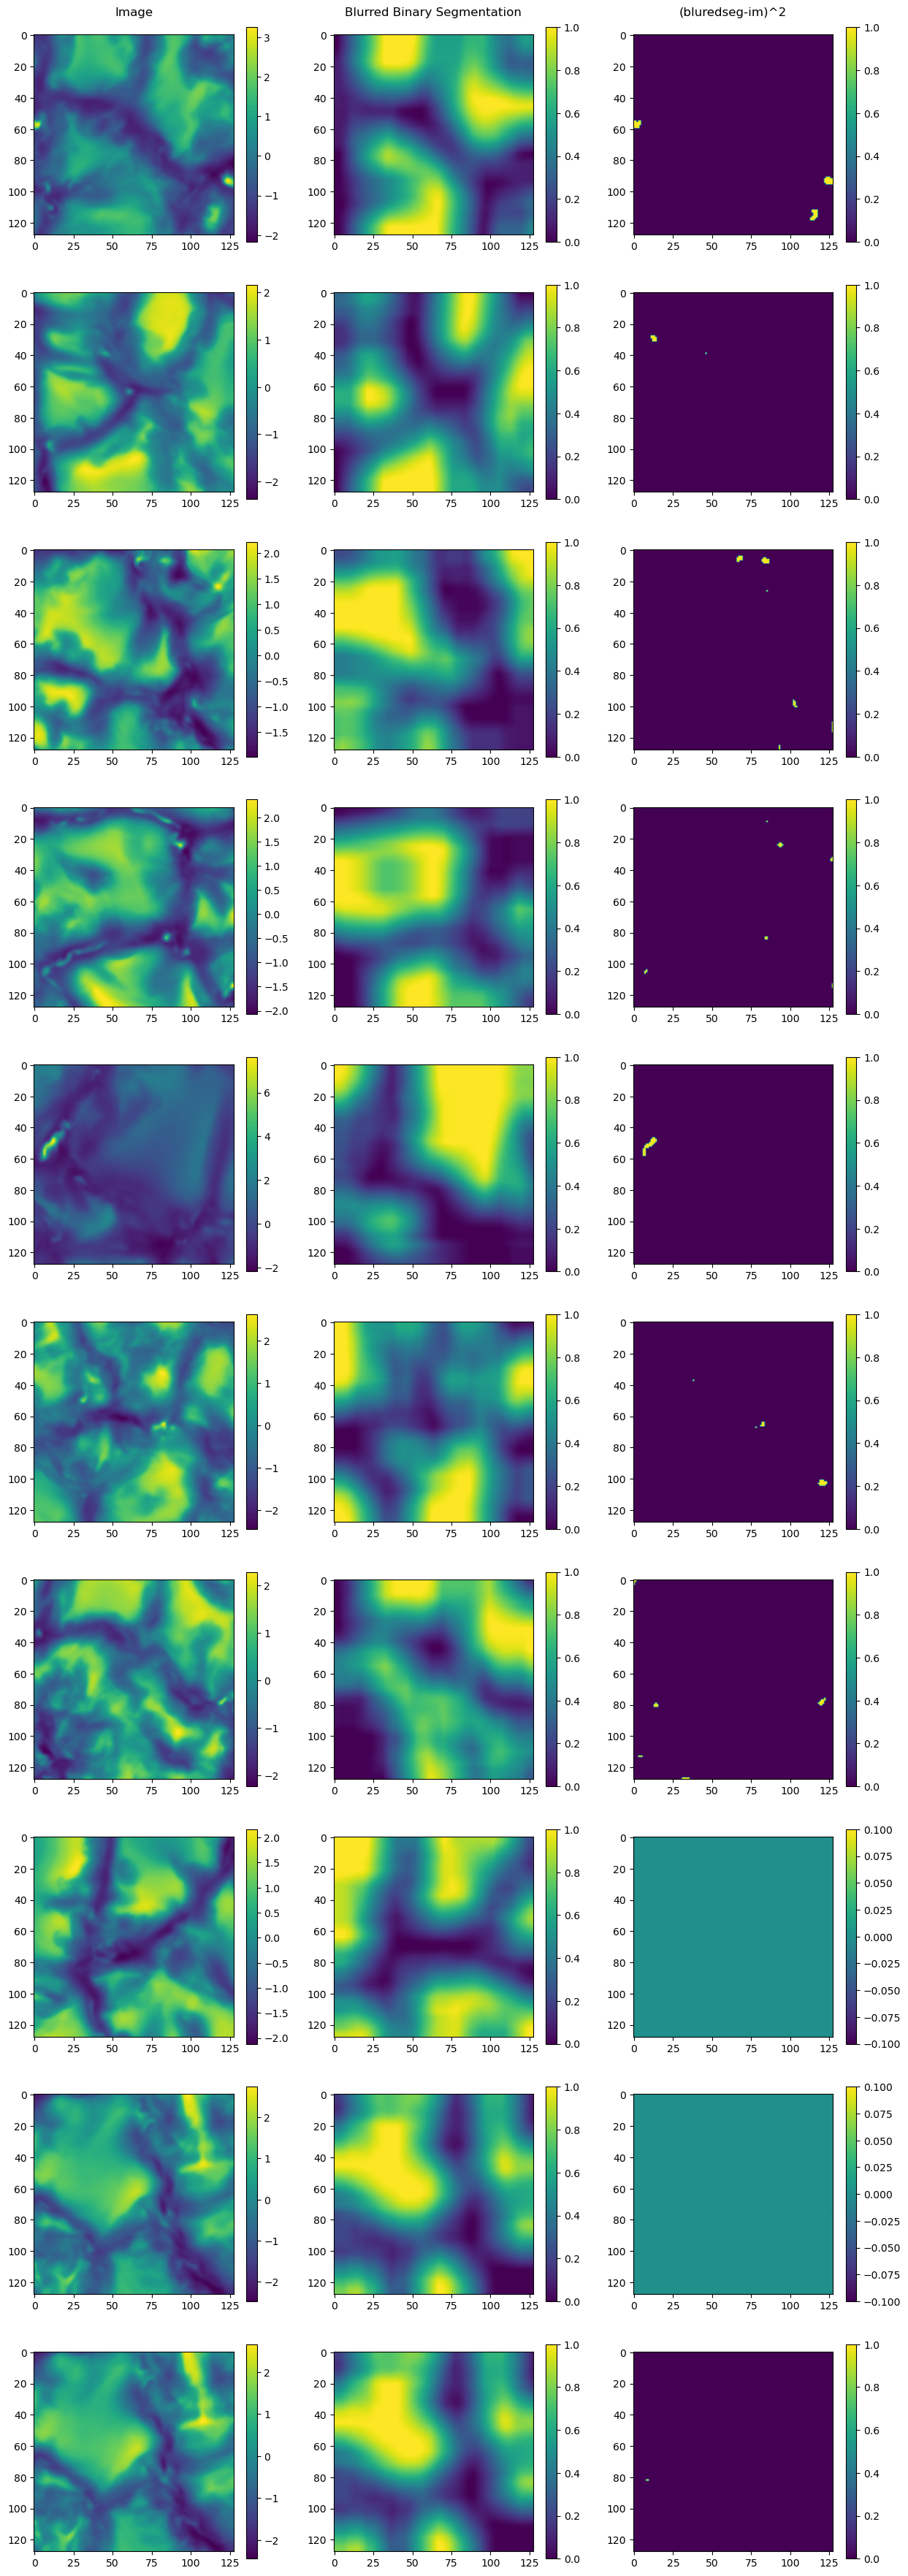

In [18]:
import cv2

name = "WNet8m"
fig, axs =  plt.subplots(10,3, figsize=(15,45))
axs[0,0].set_title(f'Image\n'); axs[0,1].set_title(f'Blurred Binary Segmentation\n'); axs[0,2].set_title(f'(bluredseg-im)^2\n')
for i in range(10):
    idx = np.random.randint(200)#131
    output_dir = f'../NN_outputs/{name}_outputs'
    im = np.load(f'{output_dir}/x_{idx}.npy')[0] # first index to get image (first channel)
    im_scaled = (im-np.min(im))/(np.max(im)-np.min(im)) # (im-np.nanmean(im))/np.nanstd(im)
    preds = np.squeeze(np.load(f'{output_dir}/pred_{idx}.npy'))
    kernel = np.ones((30,30))/900
    preds_smooth = cv2.filter2D(preds, -1, kernel)#.reshape(preds.shape)
    residuals = preds_smooth - im_scaled
    high_neg_res = np.zeros_like(residuals)
    high_neg_res[residuals < -0.5] = 1
    im0 = axs[i,0].imshow(im); plt.colorbar(im0, ax=axs[i,0])
    im1 = axs[i,1].imshow(preds_smooth); plt.colorbar(im1, ax=axs[i,1])
    im2 = axs[i,2].imshow(high_neg_res); plt.colorbar(im2, ax=axs[i,2])
#plt.savefig(f'../NN_outputs/{name}_residuals2')
